In [3]:
# import required libraries
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

# Task 1

In [4]:
keyword = pd.read_csv('Keyword_data - Keyword_data.csv')  # Acquire the dataset

keyword.dropna(subset = ['Keyword 1'], inplace = True) # Remove rows with empty values in all columns

for c in keyword.columns:
    keyword[c] = keyword[c].str.lower()  # Convert all values to lowercase
keyword

Title  \
2   meta-analyses of financial performance and equ...   
3   home country environments, corporate diversifi...   
4   safeguarding investments in asymmetric interor...   
5   managerialist and human capital explanations f...   
6   bidding wars over r&d-intensive firms: knowled...   
7   when “the show must go on”: surface acting and...   
8   relationships among supervisors' and subordina...   
9   punctuated equilibrium and linear progression:...   
13  the relationship between overconfidence and th...   
14  governance through ownership: centuries of pra...   
15  strategic satisficing? a behavioral-agency the...   
16  exploring the agency consequences of ownership...   
17  institutional ownership differences and intern...   
18  ownership structures and r&d investments of u....   
19  the determinants of executive compensation in ...   
20  ownership structure, expropriation, and perfor...   
21  ceo stock options: the silent dimension of own...   
25  assessing creativity in hollywood pitch meetin...   
26  reactions to perceived inequity in u.s. and du...   
27  the impact of community violence and an organi...   
28  explaining new ceo origin: firm versus industr...   
29  do high job demands increase intrinsic motivat...   
30  organizational hiring patterns, interfirm netw...   
31  the effects of centrifugal and centripetal for...   
32     a social capital model of high-growth ventures   
36  transforming work-family conflict into commitm...   
37  advocacy, performance, and threshold influence...   
38  managing from the boundary: the effective lead...   
39  team member functional background and involvem...   
40  happy together? how using nonstandard workers ...   
41  interpersonal aggression in work groups: socia...   
42  share price reactions to work-family initiativ...   
43  the role of human capital in postacquisition c...   
47  how much should i give and how often? the effe...   
48  self-concordance at work: toward understanding...   
49  cooperation, competition, and team performance...   
50  the impact of expectations on newcomer perform...   
51  the effects of discontinuous change on latent ...   
52  employee creativity in taiwan: an application ...   
53  media legitimation effects in the market for i...   
54  giving money to get money: how ceo stock optio...   
58  a behavioral theory of r&d expenditures and in...   
59  transformational leadership, conservation, and...   
60  informational dissimilarity and organizational...   
61  subsidiary staffing in multinational enterpris...   
62  strategic human resource practices, top manage...   
63  compensation policy and organizational perform...   
64  functional background identity, diversity, and...   
65  a customer interaction approach to strategy an...   

                                           Keyword 1  \
2                                             equity   
3                        diversification in industry   
4                      interorganizational relations   
5                             executive compensation   
6                               knowledge management   
7                              emotions (psychology)   
8                                        supervisors   
9                               industrial relations   
13                                   decision making   
14                              corporate governance   
15                                        executives   
16                 family-owned business enterprises   
17                           institutional investors   
18                            research & development   
19                 family-owned business enterprises   
20                                          property   
21                                     stock options   
25                                management science   
26                     interorganizational relations   
27                           aggression (psychology)   
28                   

In [5]:
len(keyword)

49

## Extract keyword data (excluding nan values)

In [35]:
# Create a dictionary in which keys are Titles of articles and values are a list of Keywords in each article
keyword_dict = keyword.set_index('Title').T.to_dict('list')
keyword_dict

{'meta-analyses of financial performance and equity: fusion or confusion?': ['equity',
  'organizational sociology',
  'performance',
  'meta-analysis',
  'psychometrics',
  'organizational research',
  'financial performance',
  'agency theory',
  'organizational effectiveness',
  'organizational behavior',
  'corporate governance',
  nan],
 'home country environments, corporate diversification strategies, and firm performance': ['diversification in industry',
  'business planning',
  'performance standards',
  'employees -- rating of',
  'corporate culture',
  'strategic planning',
  'organizational effectiveness',
  'management science',
  'management research',
  'product management',
  nan,
  nan],
 'safeguarding investments in asymmetric interorganizational relationships: theory and evidence': ['interorganizational relations',
  'intergroup relations',
  'business communication',
  'investments',
  'supply chains',
  'knowledge management',
  'interorganizational networks',
  'co

In [36]:
# Remove missing values in the values of dictionary
for key in keyword_dict:
    keyword_dict[key] = [x for x in keyword_dict[key] if str(x) != "nan"]

keyword_dict

{'meta-analyses of financial performance and equity: fusion or confusion?': ['equity',
  'organizational sociology',
  'performance',
  'meta-analysis',
  'psychometrics',
  'organizational research',
  'financial performance',
  'agency theory',
  'organizational effectiveness',
  'organizational behavior',
  'corporate governance'],
 'home country environments, corporate diversification strategies, and firm performance': ['diversification in industry',
  'business planning',
  'performance standards',
  'employees -- rating of',
  'corporate culture',
  'strategic planning',
  'organizational effectiveness',
  'management science',
  'management research',
  'product management'],
 'safeguarding investments in asymmetric interorganizational relationships: theory and evidence': ['interorganizational relations',
  'intergroup relations',
  'business communication',
  'investments',
  'supply chains',
  'knowledge management',
  'interorganizational networks',
  'corporate governance',


## Convert to a weighted adjacency matrix

In [37]:
# Getting pairs of all keywords of all articles
import itertools
all_keywords = []
for key in keyword_dict:
    for pair in itertools.combinations(keyword_dict[key],2):
        all_keywords.append(tuple(sorted(pair)))
all_keywords

[('equity', 'organizational sociology'),
 ('equity', 'performance'),
 ('equity', 'meta-analysis'),
 ('equity', 'psychometrics'),
 ('equity', 'organizational research'),
 ('equity', 'financial performance'),
 ('agency theory', 'equity'),
 ('equity', 'organizational effectiveness'),
 ('equity', 'organizational behavior'),
 ('corporate governance', 'equity'),
 ('organizational sociology', 'performance'),
 ('meta-analysis', 'organizational sociology'),
 ('organizational sociology', 'psychometrics'),
 ('organizational research', 'organizational sociology'),
 ('financial performance', 'organizational sociology'),
 ('agency theory', 'organizational sociology'),
 ('organizational effectiveness', 'organizational sociology'),
 ('organizational behavior', 'organizational sociology'),
 ('corporate governance', 'organizational sociology'),
 ('meta-analysis', 'performance'),
 ('performance', 'psychometrics'),
 ('organizational research', 'performance'),
 ('financial performance', 'performance'),
 ('

In [38]:
# Getting the frequency of each keyword pair
from collections import Counter
all_keywords_counter = Counter(all_keywords)
all_keywords_counter

Counter({('equity', 'organizational sociology'): 1,
         ('equity', 'performance'): 1,
         ('equity', 'meta-analysis'): 1,
         ('equity', 'psychometrics'): 1,
         ('equity', 'organizational research'): 1,
         ('equity', 'financial performance'): 1,
         ('agency theory', 'equity'): 1,
         ('equity', 'organizational effectiveness'): 1,
         ('equity', 'organizational behavior'): 1,
         ('corporate governance', 'equity'): 1,
         ('organizational sociology', 'performance'): 2,
         ('meta-analysis', 'organizational sociology'): 1,
         ('organizational sociology', 'psychometrics'): 1,
         ('organizational research', 'organizational sociology'): 2,
         ('financial performance', 'organizational sociology'): 1,
         ('agency theory', 'organizational sociology'): 3,
         ('organizational effectiveness', 'organizational sociology'): 4,
         ('organizational behavior', 'organizational sociology'): 6,
         ('corpora

In [39]:
flat_list = [item for sublist in all_keywords for item in sublist]
nodes = list(sorted(set(flat_list)))   # Getting the distinct keyword
nodes

['agency theory',
 'aggression (psychology)',
 'ambivalence',
 'anger in the workplace',
 'behavioral research',
 'boards of directors',
 'break-even analysis',
 'burnout (psychology)',
 'business communication',
 'business enterprises',
 'business enterprises -- valuation',
 'business models',
 'business networks',
 'business planning',
 'capital investments',
 'capital market',
 'capitalists & financiers',
 'charismatic authority',
 'chief executive officers',
 'commercial products',
 'compensation management',
 'competitive advantage',
 'conduct of life',
 'conflict management',
 'consolidation & merger of corporations',
 'contagion (social psychology)',
 'contingency theory (management)',
 'corporate culture',
 'corporate governance',
 'corporate image',
 'corporations -- finance',
 'corporations -- investor relations',
 'corporations -- public relations',
 'corporations -- valuation',
 'creative ability',
 'creative ability in business',
 'critical incident technique',
 'critical 

In [40]:
adj_matrix = np.zeros((len(nodes), len(nodes))) # Create an adjacency matrix with values of 0

map_idx = {node: idx for idx, node in enumerate(nodes)}   # Create index for each keyword
map_idx


{'agency theory': 0,
 'aggression (psychology)': 1,
 'ambivalence': 2,
 'anger in the workplace': 3,
 'behavioral research': 4,
 'boards of directors': 5,
 'break-even analysis': 6,
 'burnout (psychology)': 7,
 'business communication': 8,
 'business enterprises': 9,
 'business enterprises -- valuation': 10,
 'business models': 11,
 'business networks': 12,
 'business planning': 13,
 'capital investments': 14,
 'capital market': 15,
 'capitalists & financiers': 16,
 'charismatic authority': 17,
 'chief executive officers': 18,
 'commercial products': 19,
 'compensation management': 20,
 'competitive advantage': 21,
 'conduct of life': 22,
 'conflict management': 23,
 'consolidation & merger of corporations': 24,
 'contagion (social psychology)': 25,
 'contingency theory (management)': 26,
 'corporate culture': 27,
 'corporate governance': 28,
 'corporate image': 29,
 'corporations -- finance': 30,
 'corporations -- investor relations': 31,
 'corporations -- public relations': 32,
 'cor

In [43]:
for (u, v), w in all_keywords_counter.items():
    u_idx, v_idx = map_idx[u], map_idx[v]    # Map index for each keyword in the matrix
    adj_matrix[u_idx, v_idx] = w   # Map values for each pair of keywords
    adj_matrix[v_idx, u_idx] = w 

adj_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Convert into a weighted network

In [49]:
import networkx as nx
G = nx.Graph() # Create empty network
weights = []

for (u, v), w in all_keywords_counter.items():
    G.add_weighted_edges_from([(u,v,w)]) # add the edges according to the weight
    weights.append(w)

In [6]:
import matplotlib
matplotlib.rc('figure', figsize=(20, 20))
nx.draw(G, width = weights)

In [7]:
matplotlib.rc('figure', figsize=(30, 30))
nx.draw(G, width = weights, with_labels = True)  # adding labels to weighted network

In [8]:
matplotlib.rc('figure', figsize=(80, 80))
nx.draw_circular(G,with_labels=True)
plt.show()

## Compute Node degree and Strength

In [53]:
# Node Degree
degree = dict(G.degree())
degree

{'equity': 10,
 'organizational sociology': 66,
 'performance': 23,
 'meta-analysis': 10,
 'psychometrics': 10,
 'organizational research': 24,
 'financial performance': 19,
 'agency theory': 38,
 'organizational effectiveness': 104,
 'organizational behavior': 166,
 'corporate governance': 62,
 'business planning': 29,
 'diversification in industry': 18,
 'performance standards': 9,
 'employees -- rating of': 9,
 'corporate culture': 9,
 'strategic planning': 66,
 'management science': 102,
 'management research': 17,
 'product management': 24,
 'intergroup relations': 16,
 'interorganizational relations': 24,
 'business communication': 9,
 'investments': 25,
 'supply chains': 9,
 'knowledge management': 19,
 'interorganizational networks': 18,
 'group decision making': 27,
 'intellectual capital': 20,
 'executive compensation': 31,
 'wages': 17,
 'human capital': 17,
 'labor economics': 17,
 'personnel management': 93,
 'contingency theory (management)': 9,
 'compensation management'

In [54]:
# Node Strength
strength = dict(G.degree(weight = 'weight'))
strength

{'equity': 10,
 'organizational sociology': 96,
 'performance': 29,
 'meta-analysis': 10,
 'psychometrics': 10,
 'organizational research': 28,
 'financial performance': 21,
 'agency theory': 48,
 'organizational effectiveness': 144,
 'organizational behavior': 265,
 'corporate governance': 85,
 'business planning': 31,
 'diversification in industry': 20,
 'performance standards': 9,
 'employees -- rating of': 9,
 'corporate culture': 9,
 'strategic planning': 80,
 'management science': 136,
 'management research': 19,
 'product management': 28,
 'intergroup relations': 17,
 'interorganizational relations': 27,
 'business communication': 9,
 'investments': 25,
 'supply chains': 9,
 'knowledge management': 20,
 'interorganizational networks': 19,
 'group decision making': 30,
 'intellectual capital': 20,
 'executive compensation': 36,
 'wages': 18,
 'human capital': 18,
 'labor economics': 18,
 'personnel management': 126,
 'contingency theory (management)': 9,
 'compensation management

## Show the top 10 nodes by degree and top 10 nodes by strength

In [55]:
# Top 10 nodes by degree
my_sort = sorted(degree.items(), key = lambda x : x[1], reverse = True)
my_sort[:10]

[('organizational behavior', 166),
 ('organizational effectiveness', 104),
 ('management science', 102),
 ('personnel management', 93),
 ('decision making', 90),
 ('organizational structure', 74),
 ('organizational sociology', 66),
 ('strategic planning', 66),
 ('industrial management', 64),
 ('corporate governance', 62)]

In [56]:
# Top 10 nodes by strength
my_sort = sorted(strength.items(), key = lambda x : x[1], reverse = True)
my_sort[:10]

[('organizational behavior', 265),
 ('organizational effectiveness', 144),
 ('management science', 136),
 ('personnel management', 126),
 ('decision making', 112),
 ('organizational structure', 107),
 ('organizational sociology', 96),
 ('corporate governance', 85),
 ('industrial management', 84),
 ('strategic planning', 80)]

## Top 10 node pairs by weight

In [57]:
all_keywords_counter.most_common(10)

[(('organizational behavior', 'organizational effectiveness'), 11),
 (('organizational behavior', 'organizational structure'), 9),
 (('organizational behavior', 'personnel management'), 8),
 (('management science', 'organizational behavior'), 7),
 (('organizational behavior', 'organizational sociology'), 6),
 (('corporate governance', 'organizational behavior'), 6),
 (('decision making', 'organizational behavior'), 6),
 (('organizational effectiveness', 'organizational structure'), 6),
 (('industrial relations', 'organizational behavior'), 5),
 (('organizational behavior', 'organizational change'), 5)]

## Plot average strength on y-axis and degree on x-axis

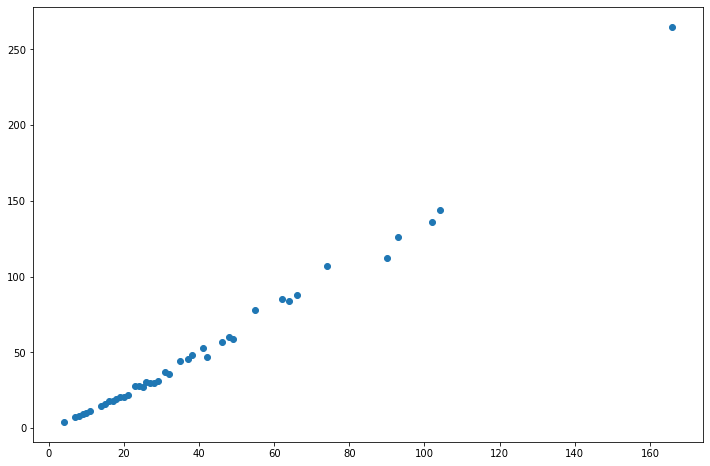

In [58]:
from collections import defaultdict

my_dict = defaultdict(list)

for key in degree:
    my_dict[degree[key]].append(strength[key])
    
    
degree_list, avg_strength_list = [], []    
for k, v in my_dict.items():
    degree_list.append(k)
    avg_strength_list.append(np.mean(v))
    
matplotlib.rc('figure', figsize=(12, 8))
plt.scatter(degree_list, avg_strength_list)    

# Task 2

In [59]:
# ! pip install nltk

In [61]:
import nltk
# downloading required packages
nltk.download('stopwords') 
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /Users/vy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
def task_2(year:int):
    path = f"task2_dataset/{year}.csv" # getting the file path
    df = pd.read_csv(path) # Reading the dataset into dataframe according to file path for each year
    
    tweet = ''
    for t in df['tweet']:
        tweet += t
    
    stop_words = stopwords.words('english')
    # Adding emojis and other stop words to add
    stop_words.extend(['😮', '💔', '🙄', '♥️', '💦', '🎮', '🦊', '🐶', '🧲', '👌', '⛈', '🪦', '🖤', '?', '😎', '👍', '🎶', '😢', '🔥',
                       '🦄', '🧦', '☹️', '😀', '🧐', '🧐', '🔝', '@', ',', 'A', '.', ':', ';', '&', 'I', '!', 
                       '’', ')', '(', '🤣', '?', '“', '”','We', '...','S', 'like', "'s", "n't", "''", "``", '…',
                       ',', '.', ':', ';', '’', '“', '”', '&', '@', 'A', 'I', '!', '(', ')', '💯', '💥', 'The', 
                       'We', 'In', 'It', 'This', 'If']) 
 
    allwords = word_tokenize(tweet) # tokenize the words by splitting
    no_stop_words = []
    for x in allwords:
        if x not in stop_words:
            no_stop_words.append(x) # appending to array if the word is not one of the stopwords

    new_words = nltk.FreqDist(no_stop_words) # To build the frequency distribution 
    return new_words, no_stop_words

## Compute word frequencies for each year. Exclude the stop words

In [26]:
def word_frequencies(year:int):
    new_words, no_stop_words = task_2(year)
    freq_res = new_words.items()
    return freq_res

In [27]:
year_list = list(range(2017,2023)) # To get the data from 2017 to 2022
for year in year_list:
    res = word_frequencies(year) # calculate the frequency of words according to the year
    print(f'Work frequencies for {year}')
    print(res)
    print('*'*70)

Work frequencies for 2017
dict_items([('neilsiegel', 1), ('Tesla', 250), ('Coming', 11), ('soon', 60), ('Kreative', 1), ('Vastly', 3), ('better', 52), ('maps/nav', 1), ('coming', 44), ('dd_hogan', 1), ('Ok', 8), ('Jason', 1), ('Sure', 6), ('kabirakhtar', 1), ('Yeah', 51), ('terrible', 3), ('Had', 2), ('upgrade', 11), ('old', 9), ('Linux', 5), ('OS', 3), ('bunch', 2), ('drivers', 2), ('first', 65), ('Major', 5), ('browser', 6), ('upgrades', 3), ('cars', 72), ('months', 23), ('Note', 2), ('slower', 3), ('code', 8), ('optimized', 1), ('sustainableanna', 1), ('VanSeedBank', 2), ('Similar', 3), ('total', 6), ('size', 15), ('Maybe', 24), ('slightly', 9), ('bigger', 7), ('account', 3), ('really', 60), ('gamechanging', 1), ('think', 38), ('feature', 7), ('add', 12), ('IamSamCrompton', 1), ('Sustainable', 1), ('energy', 24), ('production', 38), ('solar', 35), ('batteries', 9), ('grow', 2), ('much', 62), ('faster', 11), ('auto', 15), ('percentage', 1), ('basis', 1), ('That', 69), ('big', 26), ('

## Show top 10 words  for each year by the highest value of word frequencies

In [28]:
def most_common(year:int):
    new_words, no_stop_words = task_2(year)
#     common_res = new_words.tabulate(10,tablefmt='fancy_grid')
#     print(type(new_words))
    word_df = pd.DataFrame(new_words.items(), columns=['word', 'frequency']) #To create the df of words and their frequncy count for each year
    word_df = word_df.sort_values(by='frequency', ascending=False)
    return word_df.head(10)

In [29]:
year_list = list(range(2017,2023))
for year in year_list: # looping to get the data for all 5 years
    print(f'Work frequencies for {year}')
    common_word = most_common(year)
    print(common_word,"\n",'*'*70)

Work frequencies for 2017
        word  frequency
240    https        445
6996    http        411
1      Tesla        250
138      amp        219
66     Model        168
225   rocket        123
77      good        112
216   SpaceX        111
67         3         92
607      car         90 
 **********************************************************************
Work frequencies for 2018
       word  frequency
21      amp        527
3     Tesla        425
26    https        323
150     car        111
174       3        103
173   Model         92
343  SpaceX         84
37      Yes         82
435    Will         73
99   people         69 
 **********************************************************************
Work frequencies for 2019
                 word  frequency
14                amp       1218
249             Tesla       1207
224             https       1139
17031            http        411
213            SpaceX        404
1552            Model        313
139    Erdayastronaut       

## Plot histogram of word frequencies for each year

In [30]:
def plot_word_frequencies(year:int): 
    new_words, no_stop_words = task_2(year)
    dataseries = pd.Series( dict(new_words.most_common(100))) #to get the top 100 most common words for every year
    fig, ax = plt.subplots(figsize = (10,20)) # setting figure size

    sns.barplot(y = dataseries.index,x = dataseries.values, palette= "coolwarm") # making horizontal bar plots 
    plt.title(f'Word frequencies for the year {year}', size = 16) # setting the title for graphs
    plt.xlabel('Word Frequency', size = 14) # setting x label for graphs
    plt.show()

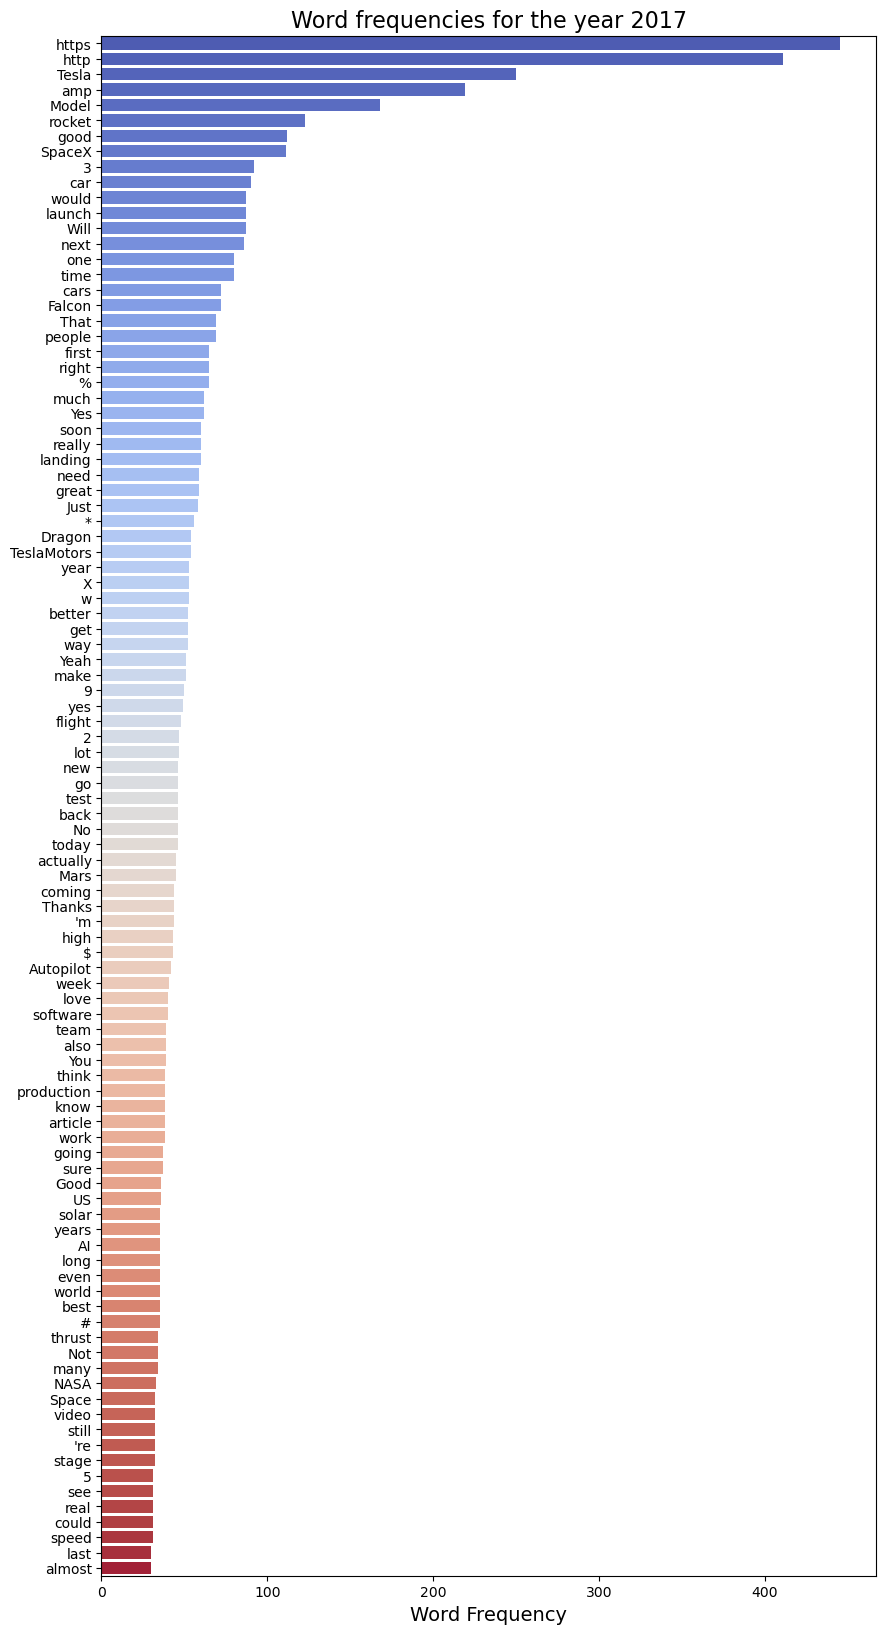

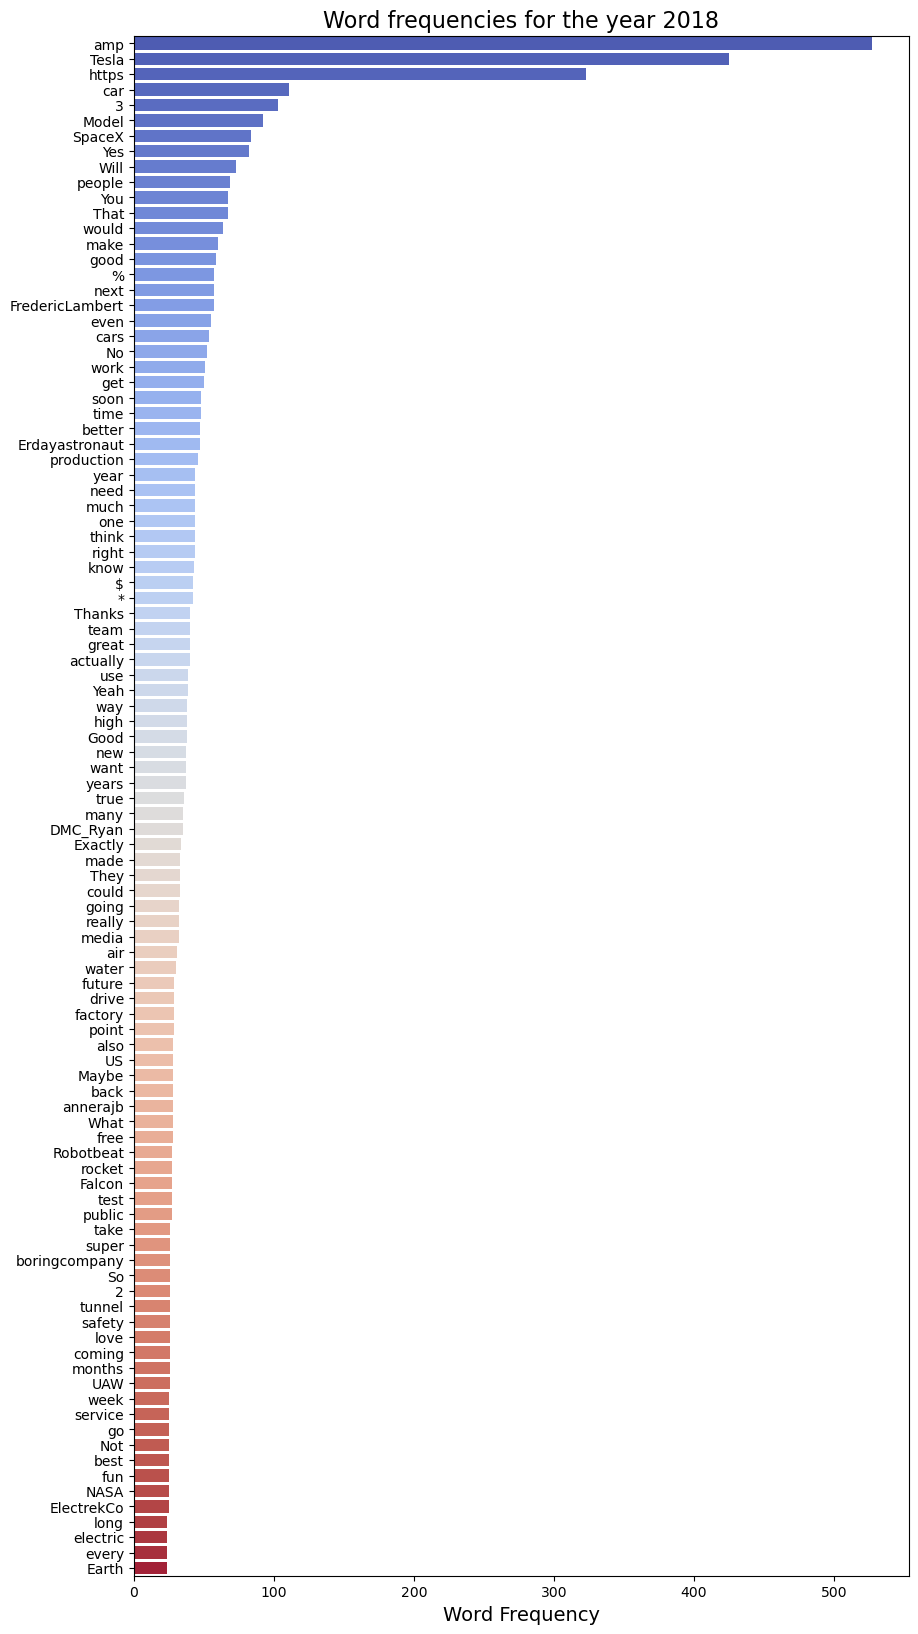

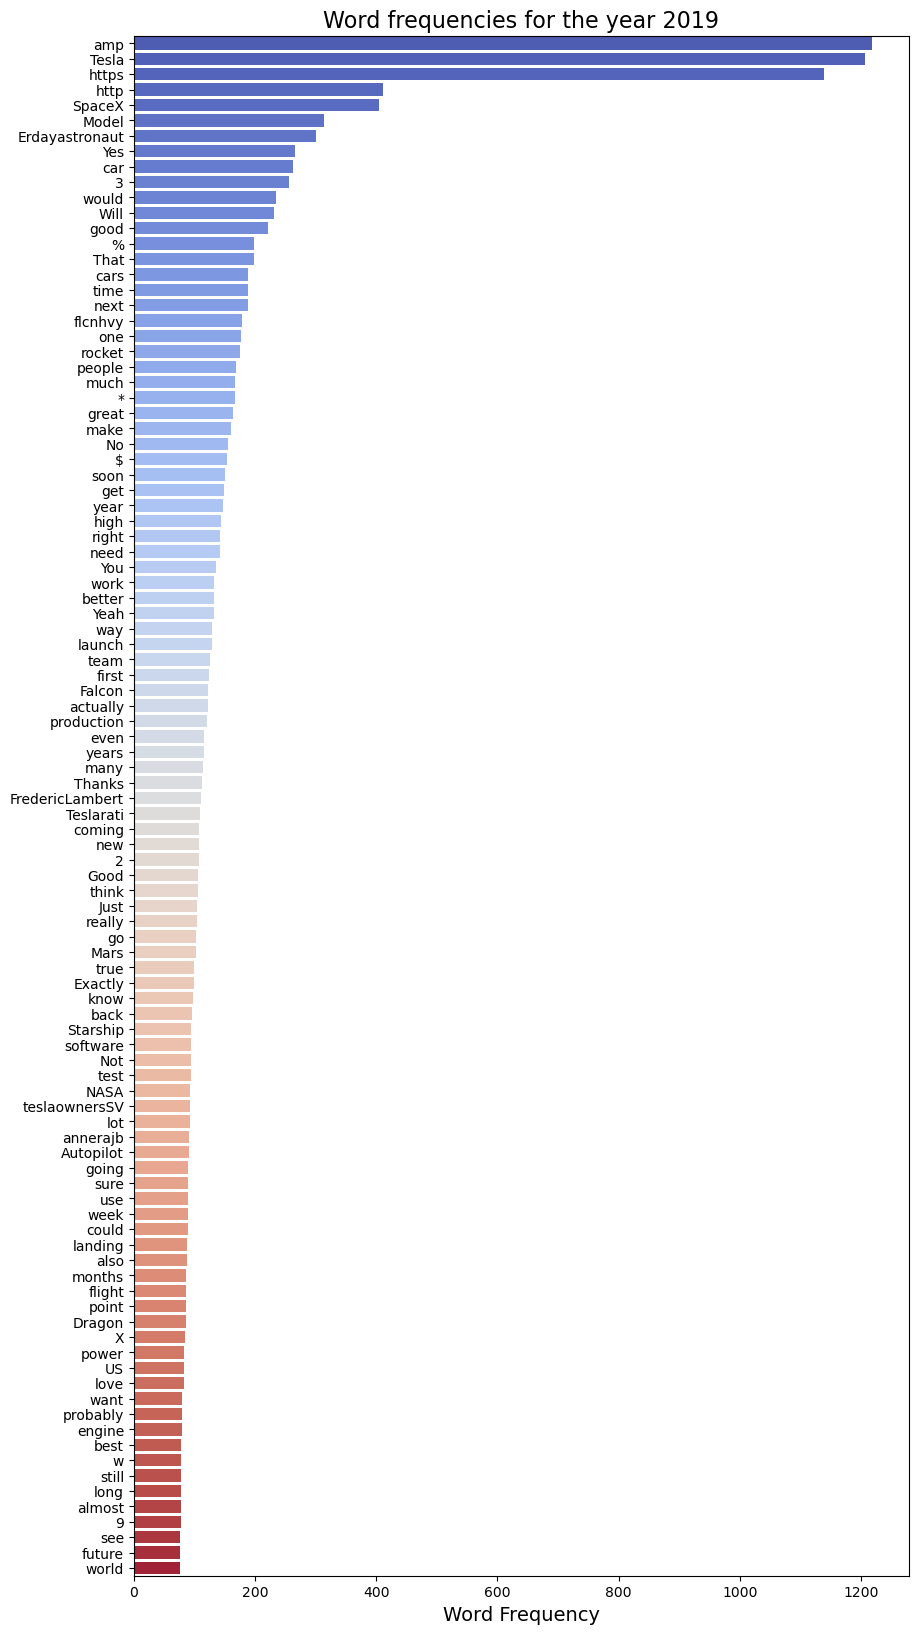

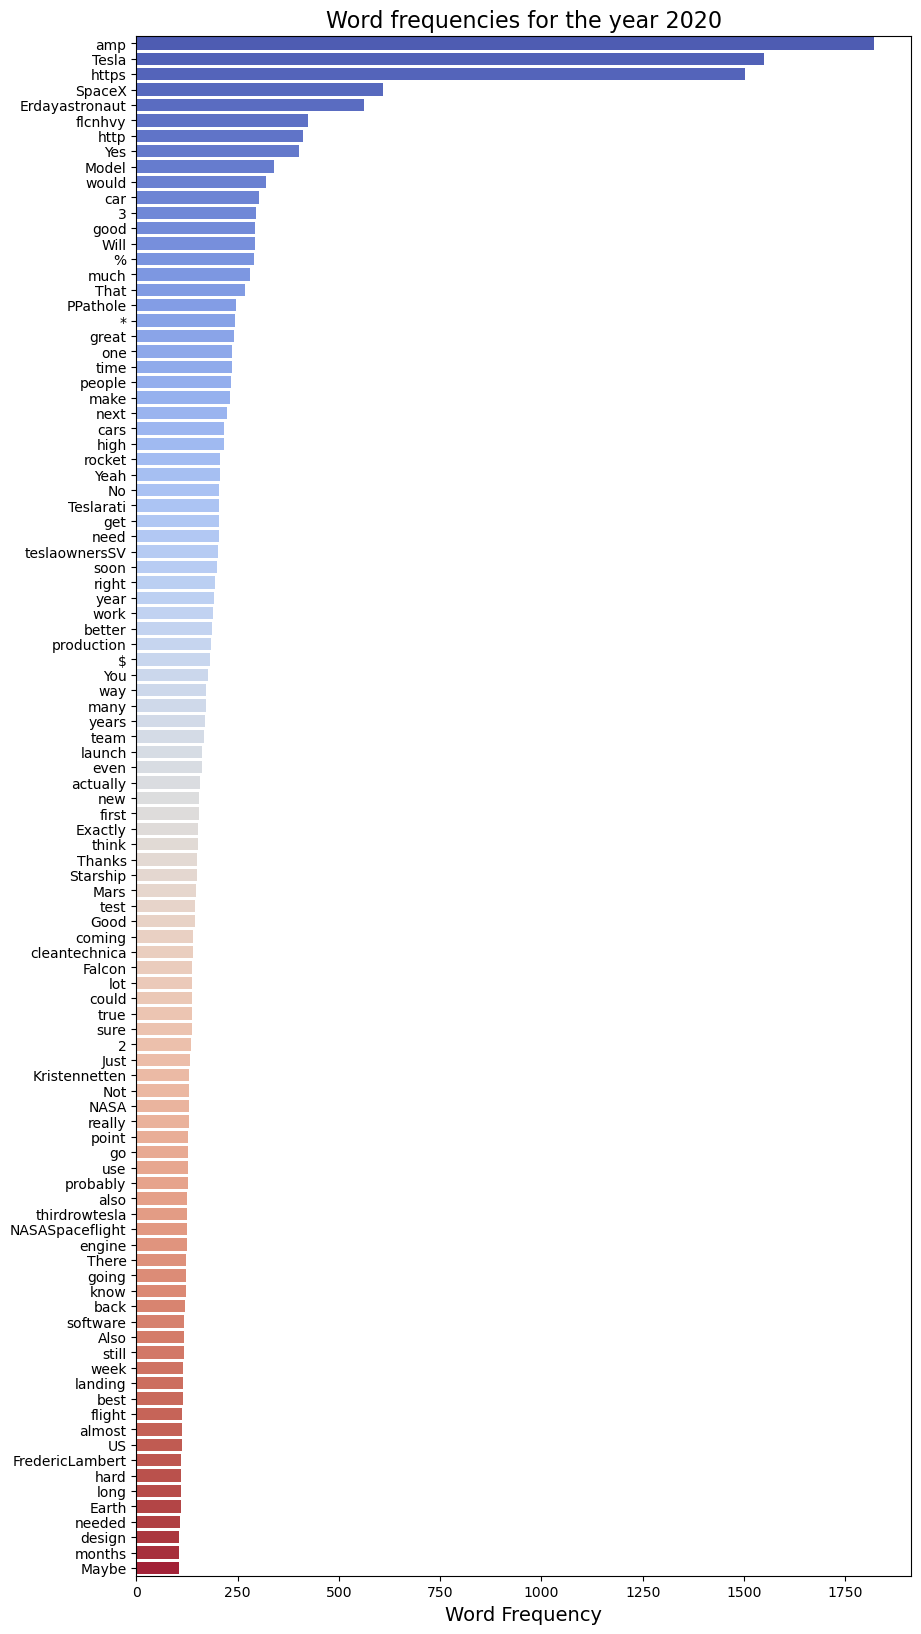

C:\Users\prakh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


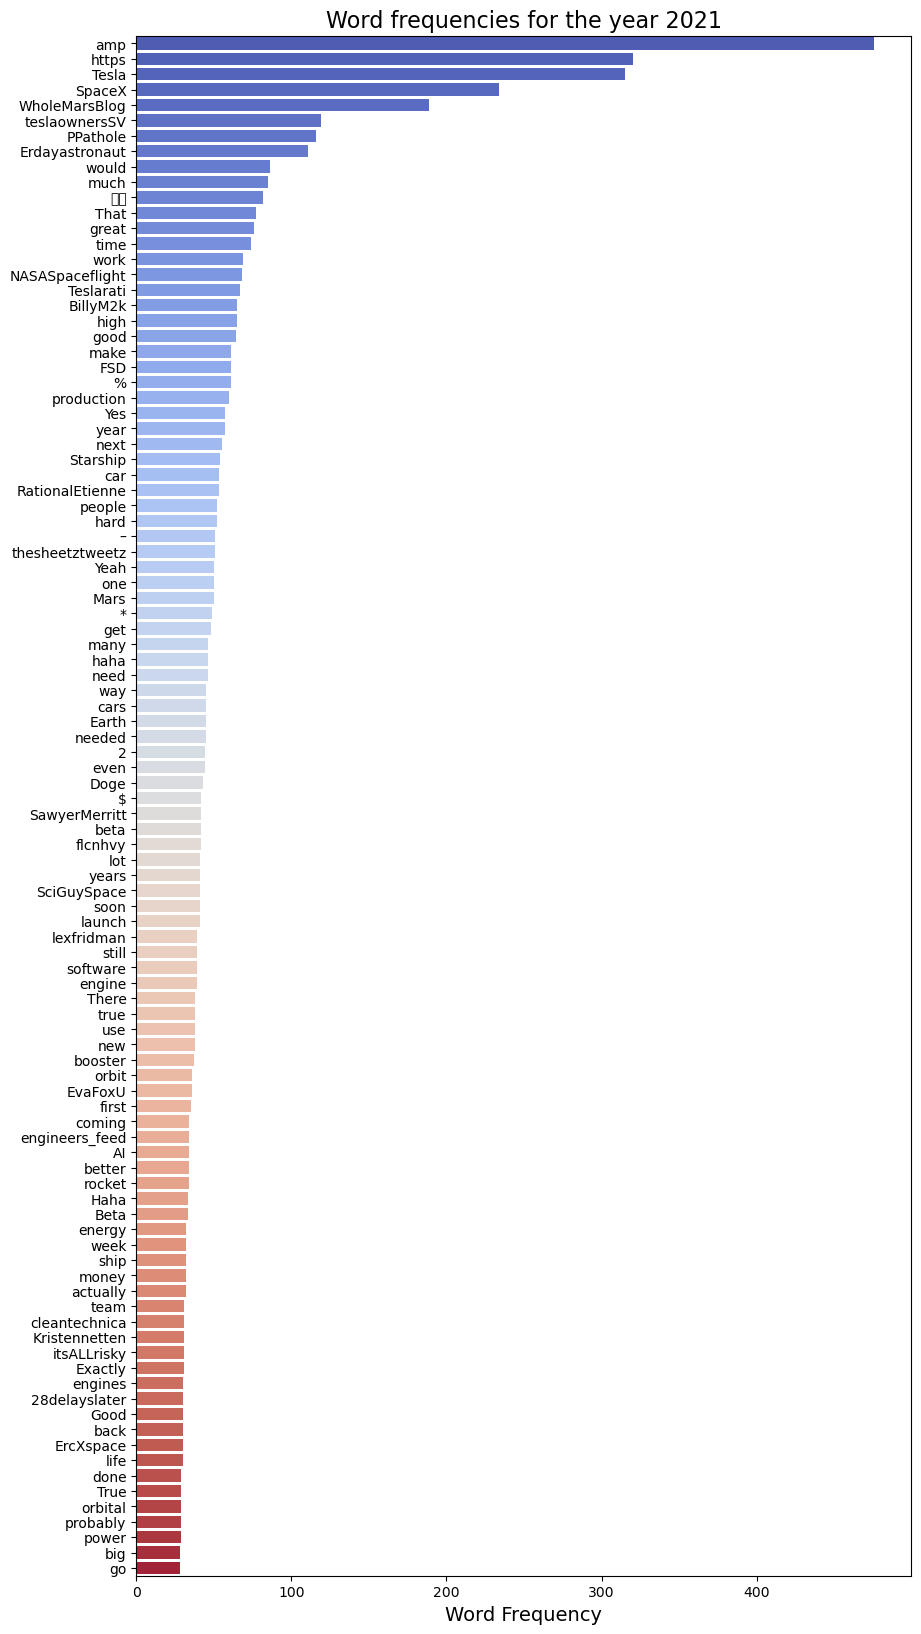

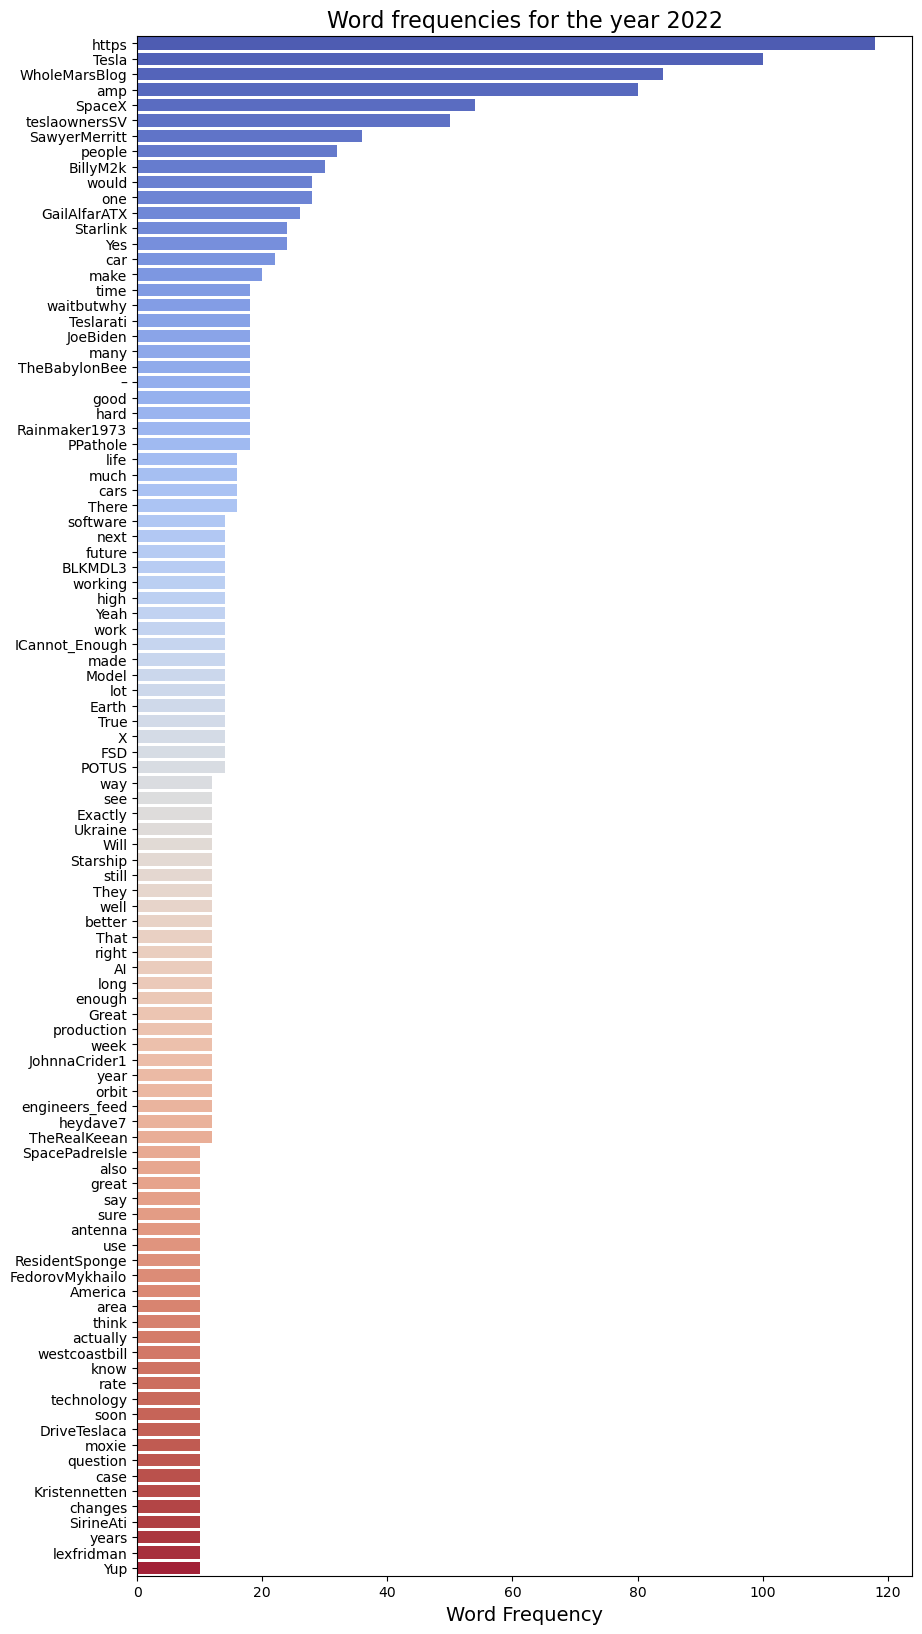

In [31]:
year_list = list(range(2017,2023))
for year in year_list:
    histogram = plot_word_frequencies(year) # calling the function to plot histogram for each year

## Use Zipf's law and plot log-log plots of word frequencies and rank for each year

In [32]:
#improting required libraries
import scipy.stats as ss
import math

def plot_rankdata(year:int): # Function to create log-log plots
    new_words, no_stop_words = task_2(year) 
    rank_word = ss.rankdata([freq for freq in new_words.values()])
    frequencies = [math.log(freq) for freq in new_words.values()] # calculating log for frequency
    rank = [math.log(rank) for rank in rank_word] # calculating log for ranks
    
    
    fig, ax = plt.subplots(figsize = (15,10)) # setting figure size
    plt.plot(frequencies, rank, 'bo') # drawing frequency plot
    plt.title(f'Log-log plot of word frequencies and rank for the year {year}', size = 16) # setting title for plot
    plt.xlabel('Frequency', size = 14) # setting x label for plot
    plt.ylabel('Rank', size = 14) # setting y label for plot
    plt.show()

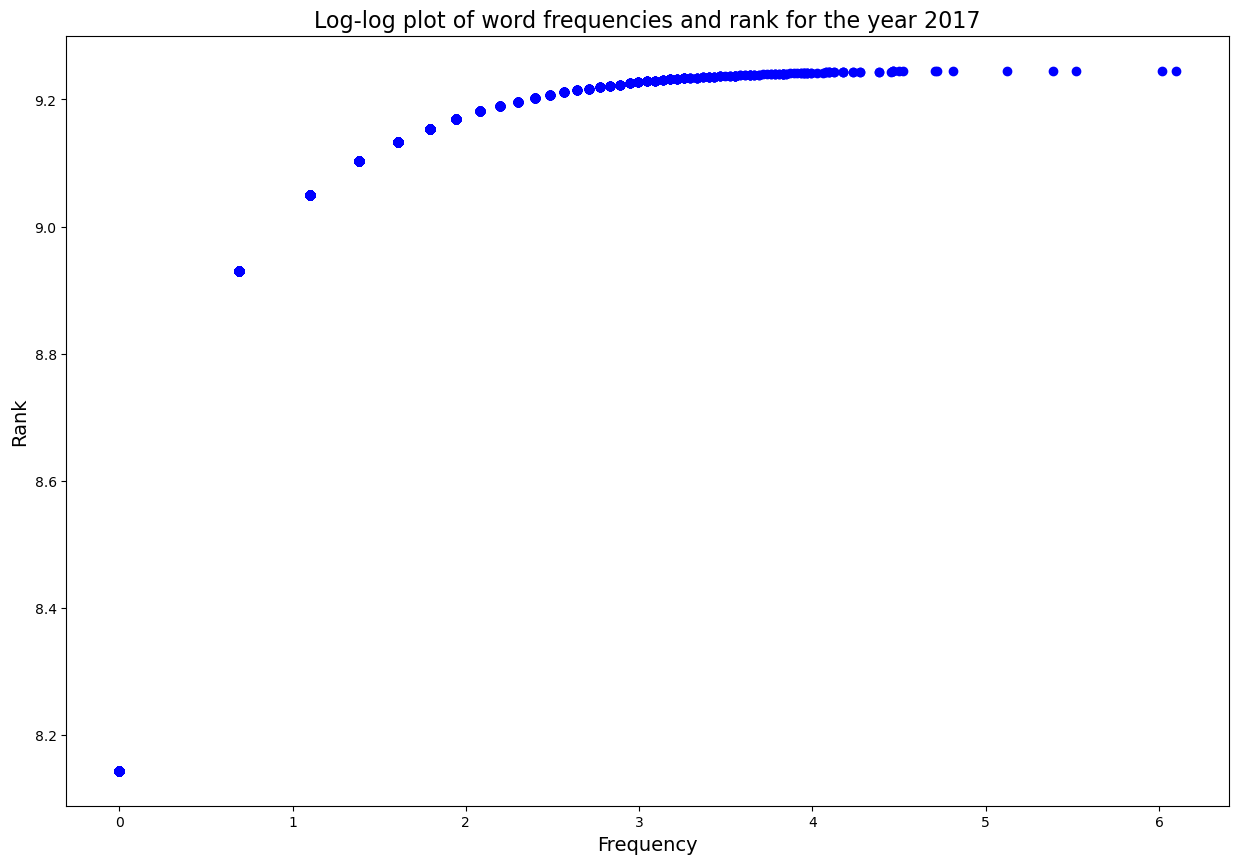

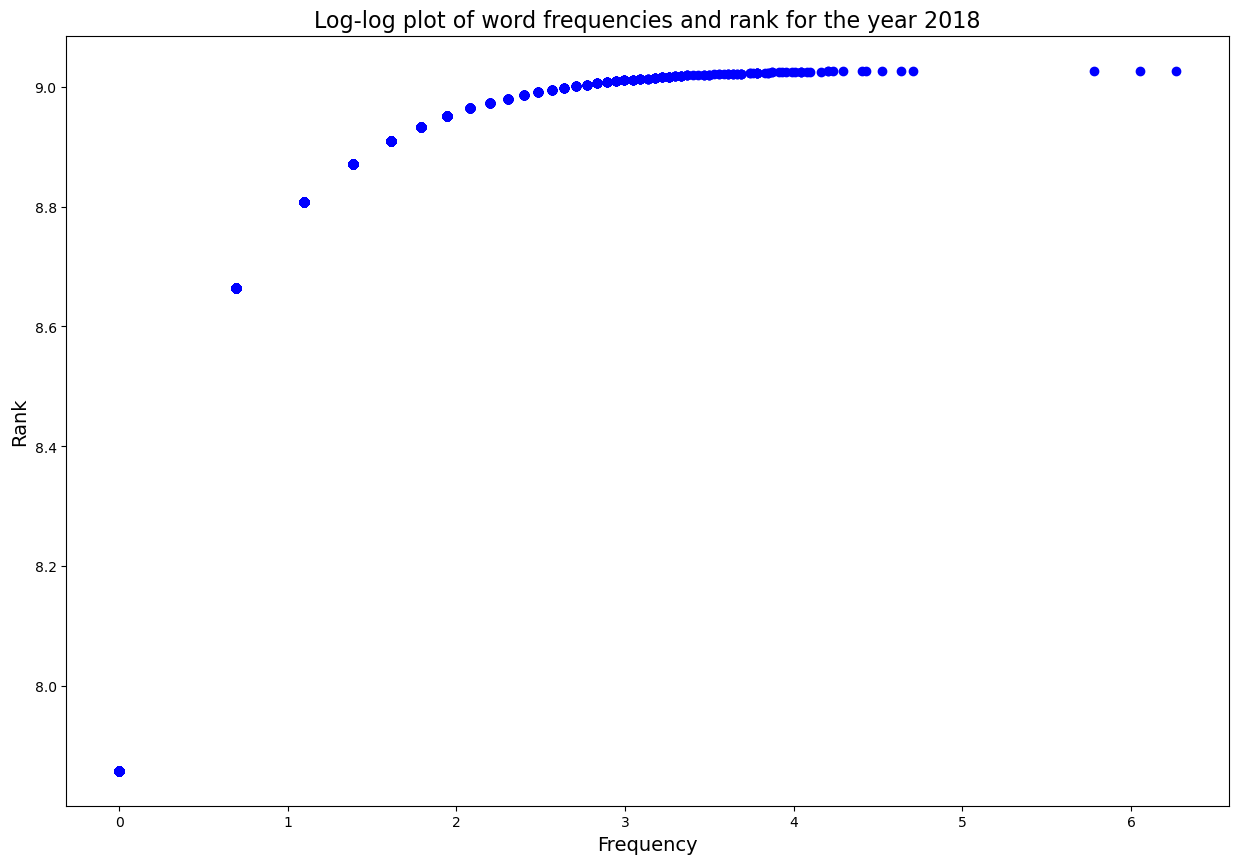

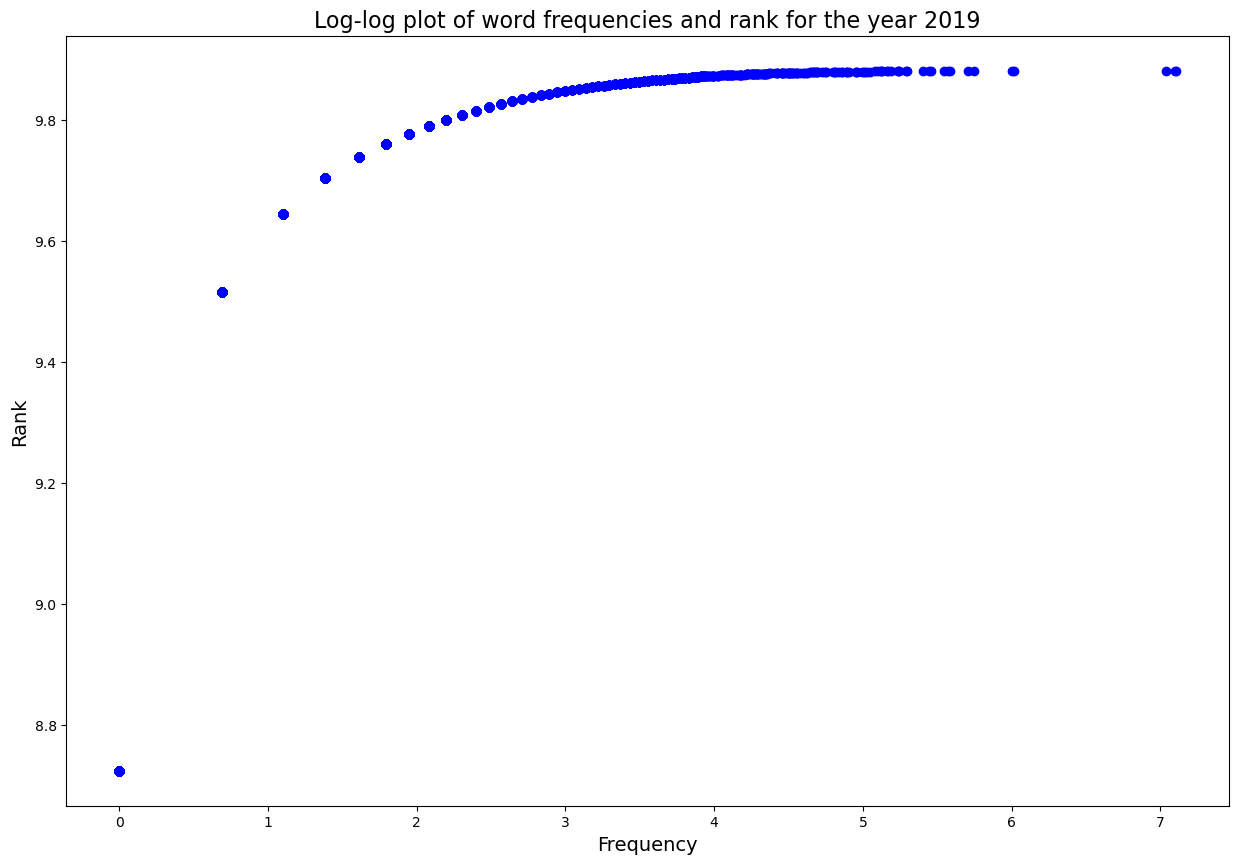

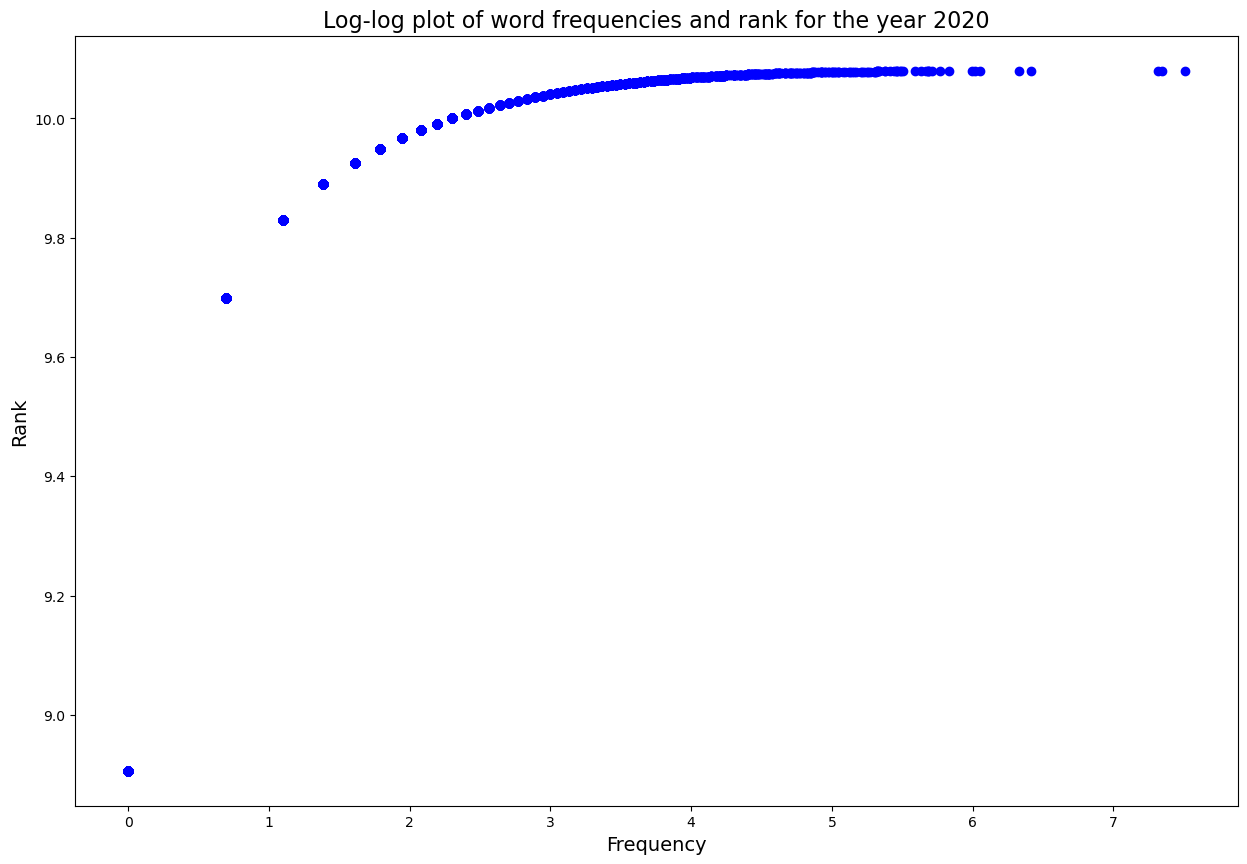

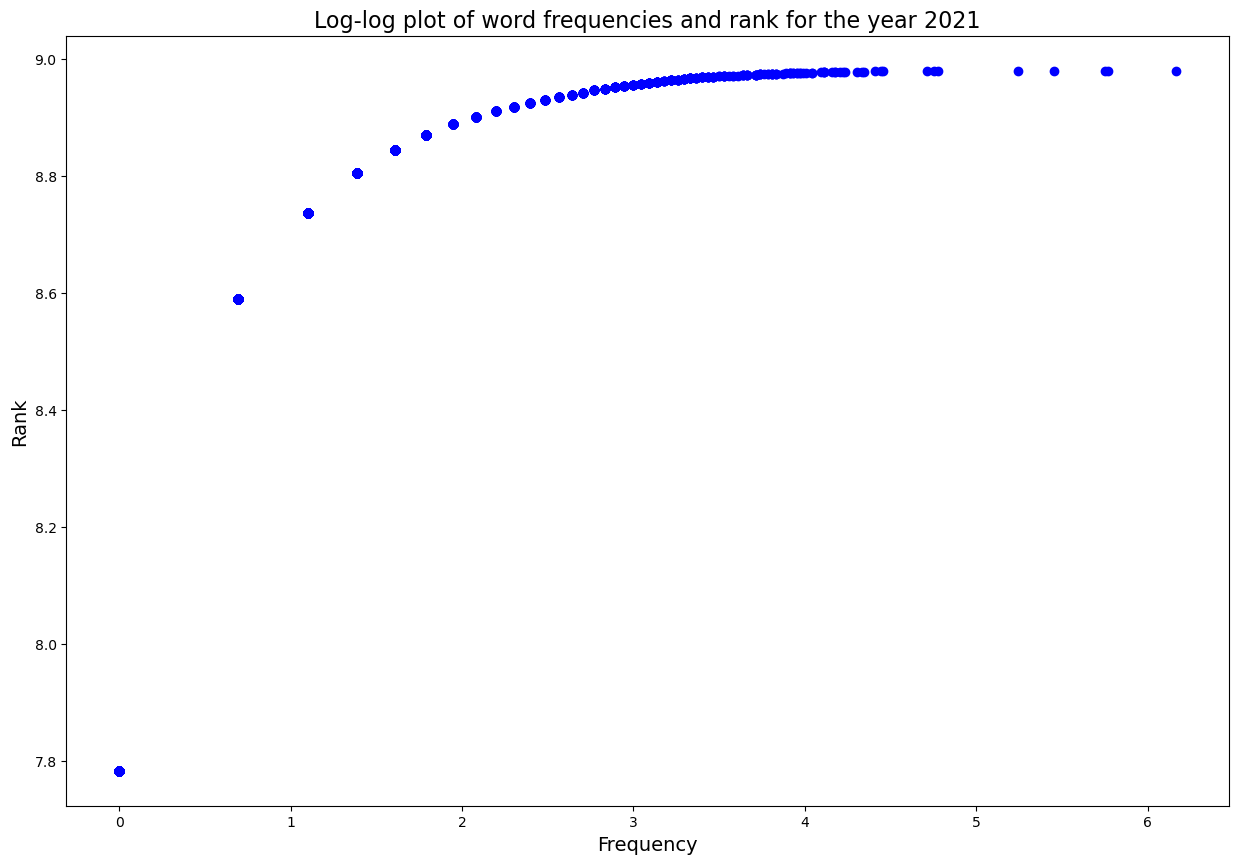

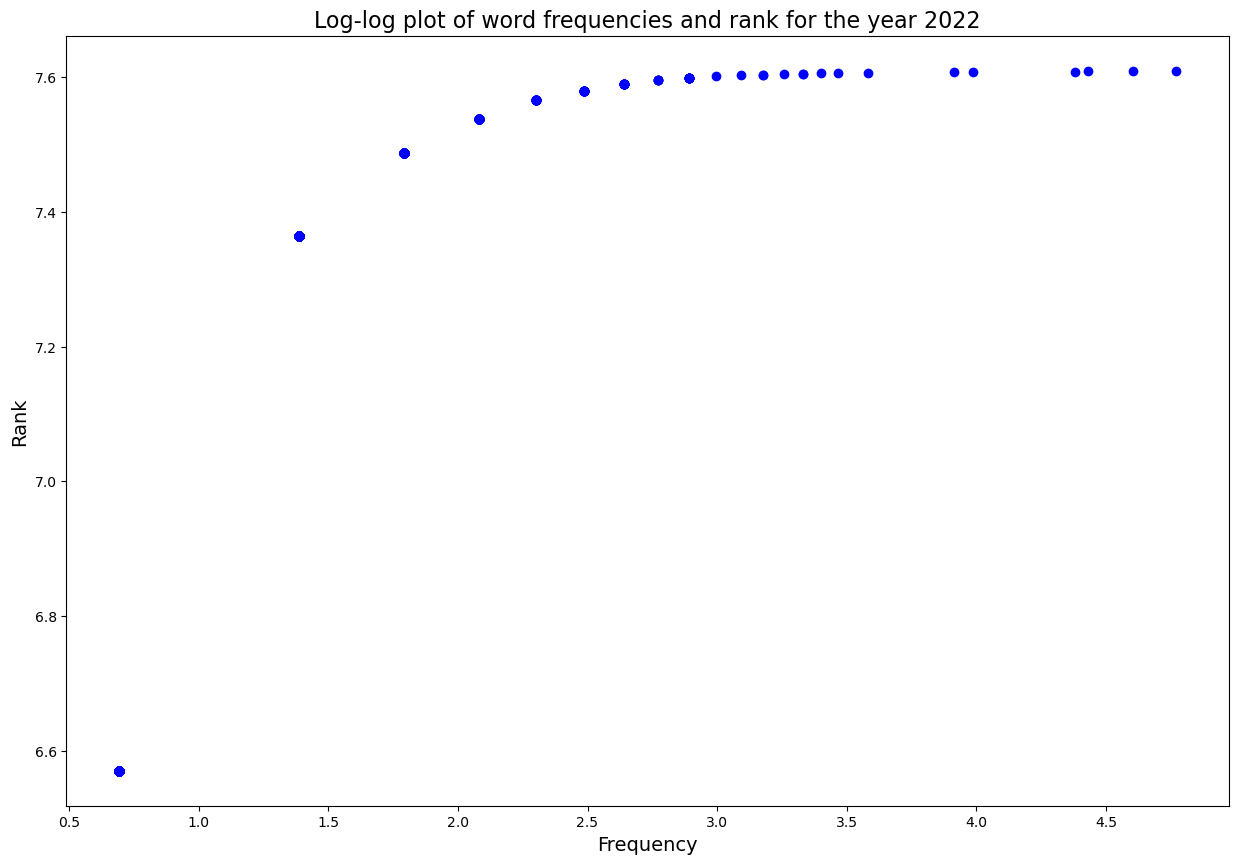

In [33]:
year_list = list(range(2017,2023))
for year in year_list:
    log_plot = plot_rankdata(year) # calling log-log plot for year data

## Create biagram network graphs for each year

In [36]:
import networkx as nx
from nltk import bigrams

def bigram_network(year:int): # Function to create empty bigram network
    new_words, no_stop_words = task_2(year)
    bi_words = list(nltk.bigrams(no_stop_words)) # to create list of no_stop_words
    bi_analysis = nltk.FreqDist(bi_words) # Build the frequency distribution
    G = nx.Graph() # Creating Network graph
    w = []
    for index, row in bi_analysis.most_common(100): # Using only top 100 words to create the network Graph
        G.add_weighted_edges_from([(index[0], index[1], row)]) # To add the edges for Network Graph
        w.append(row) 


    plt.figure(figsize=(30,30)) # setting figure size
    options = {
        'edge_color': '#998561',
        'width': w,
        'with_labels': True,
        'font_weight': 'regular',
    } # setting the edge color, width, labels and font weight for network diagram 

    nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=10), **options) # Draw the network diagram
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#888888")  # Setting the color to edges
    plt.show()

Year 2017


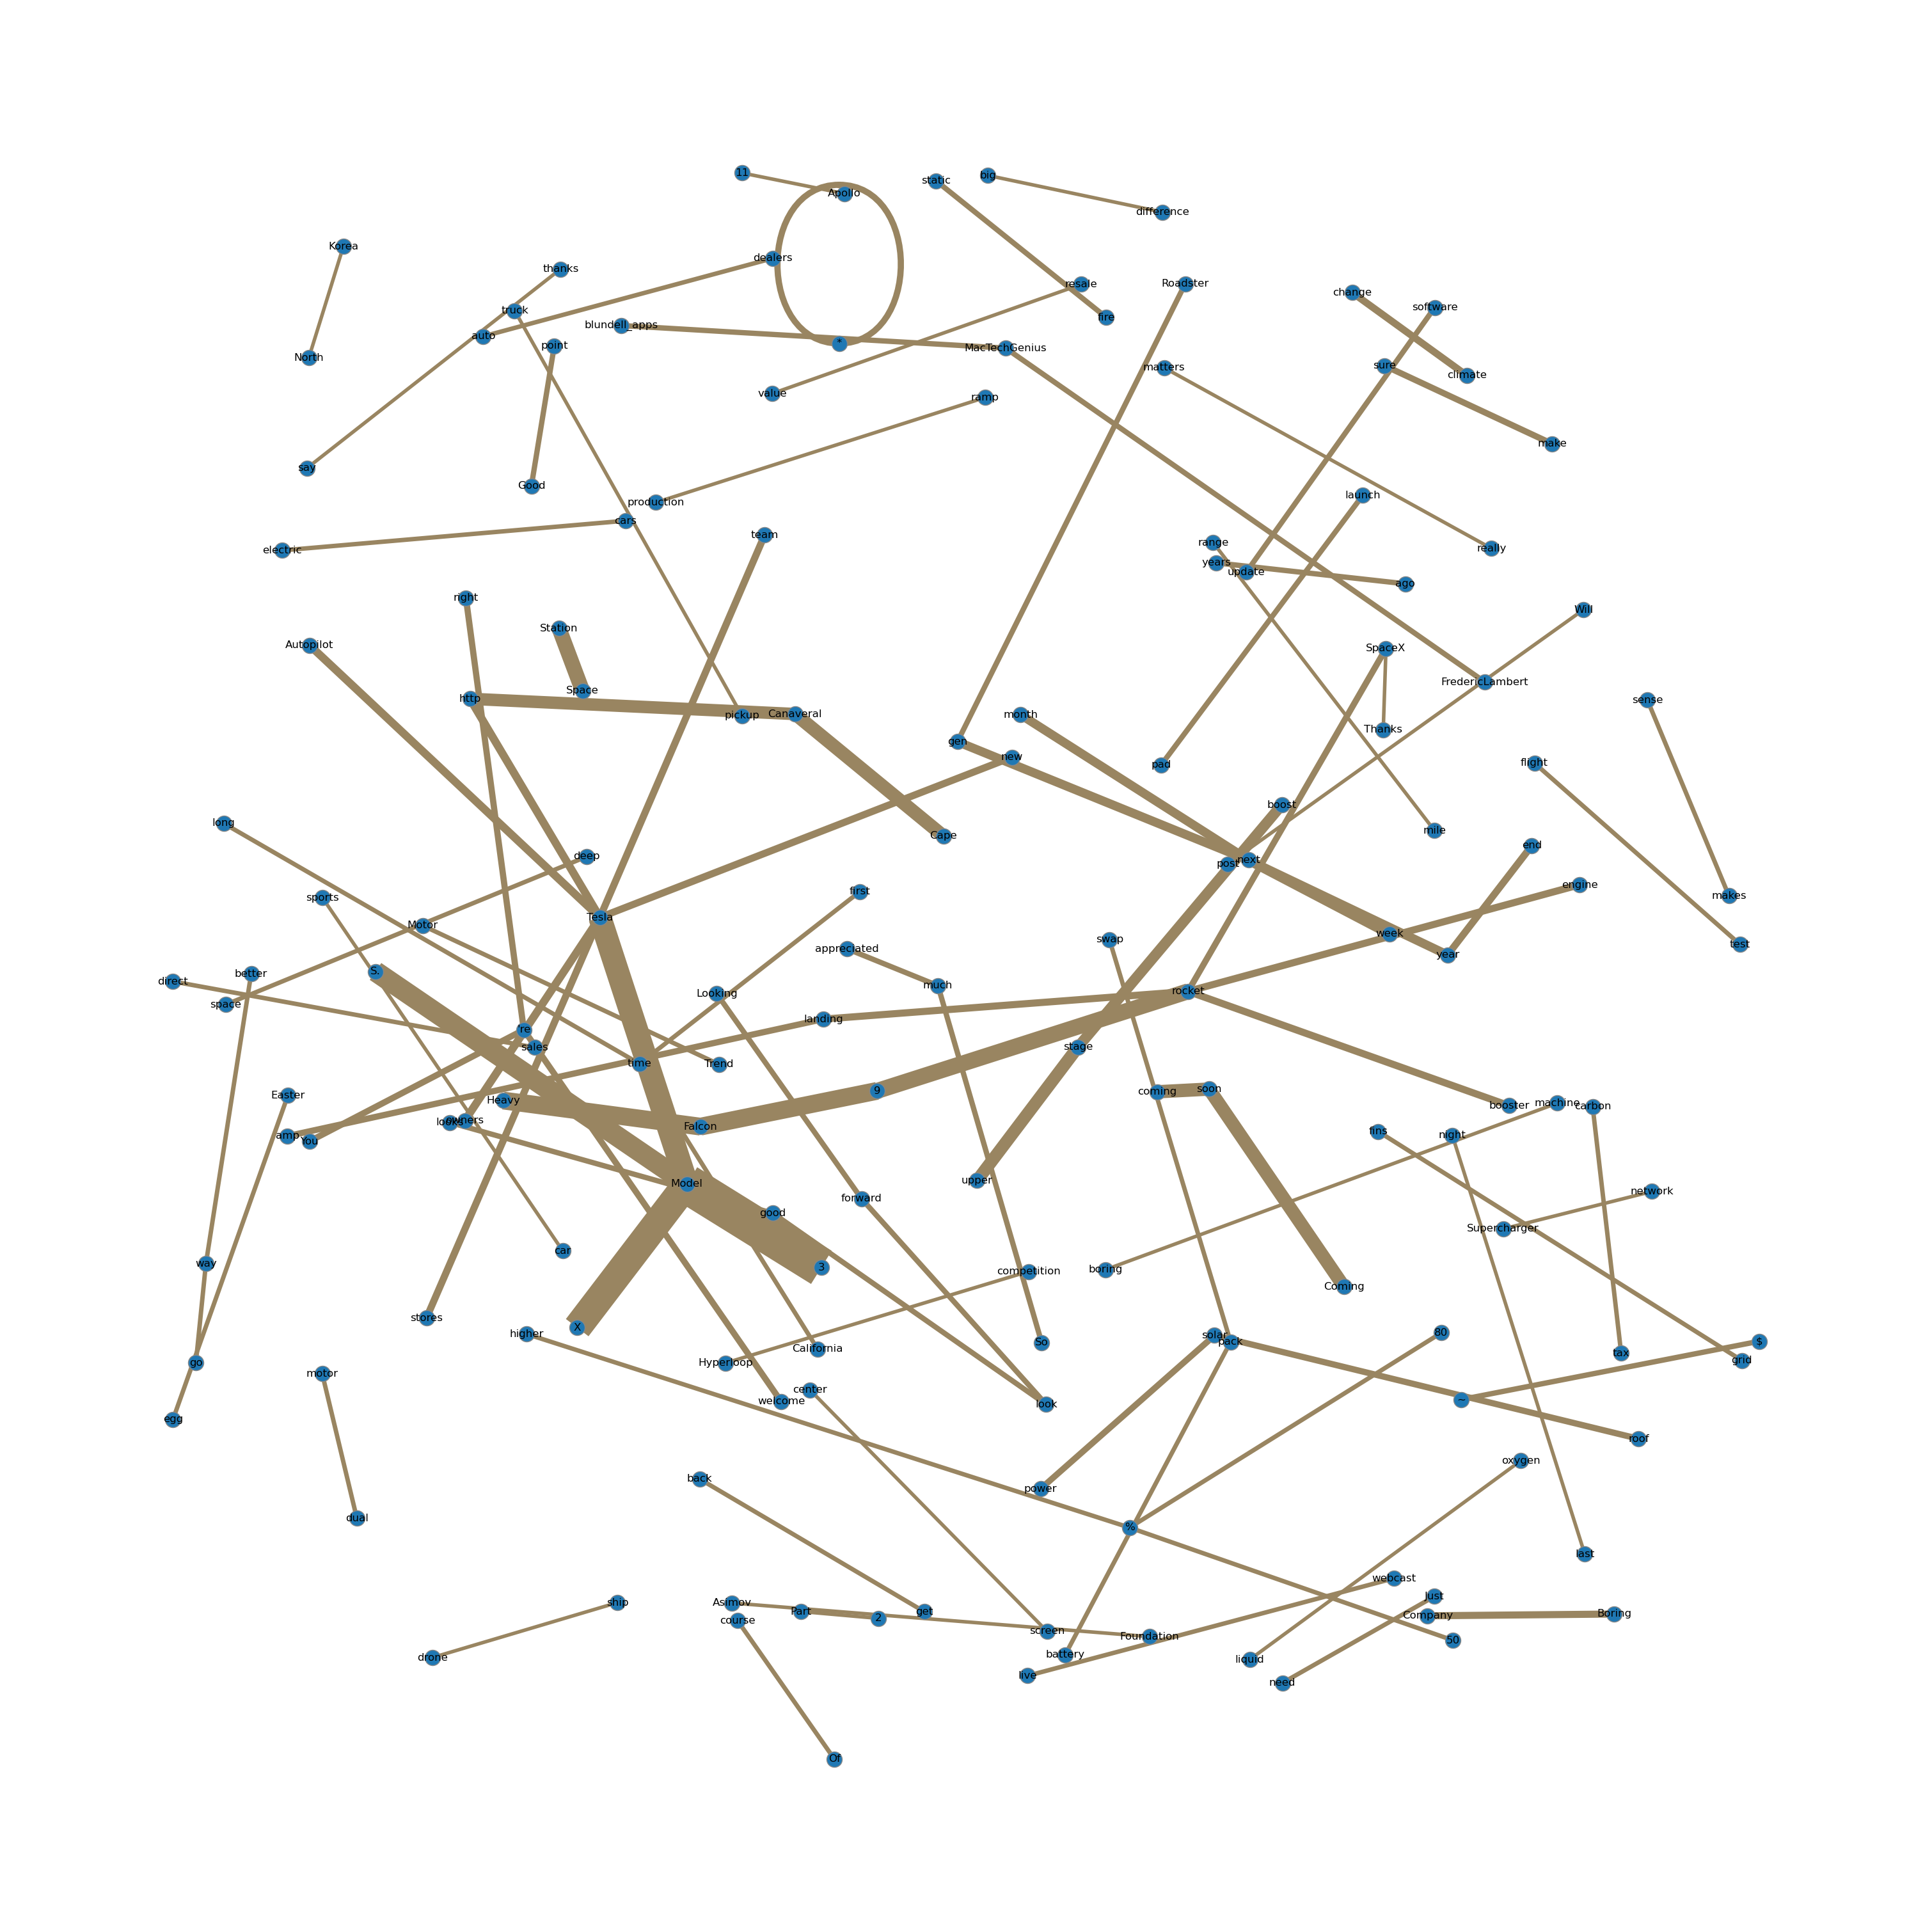

Year 2018


C:\Users\prakh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128760 (\N{FLYING SAUCER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


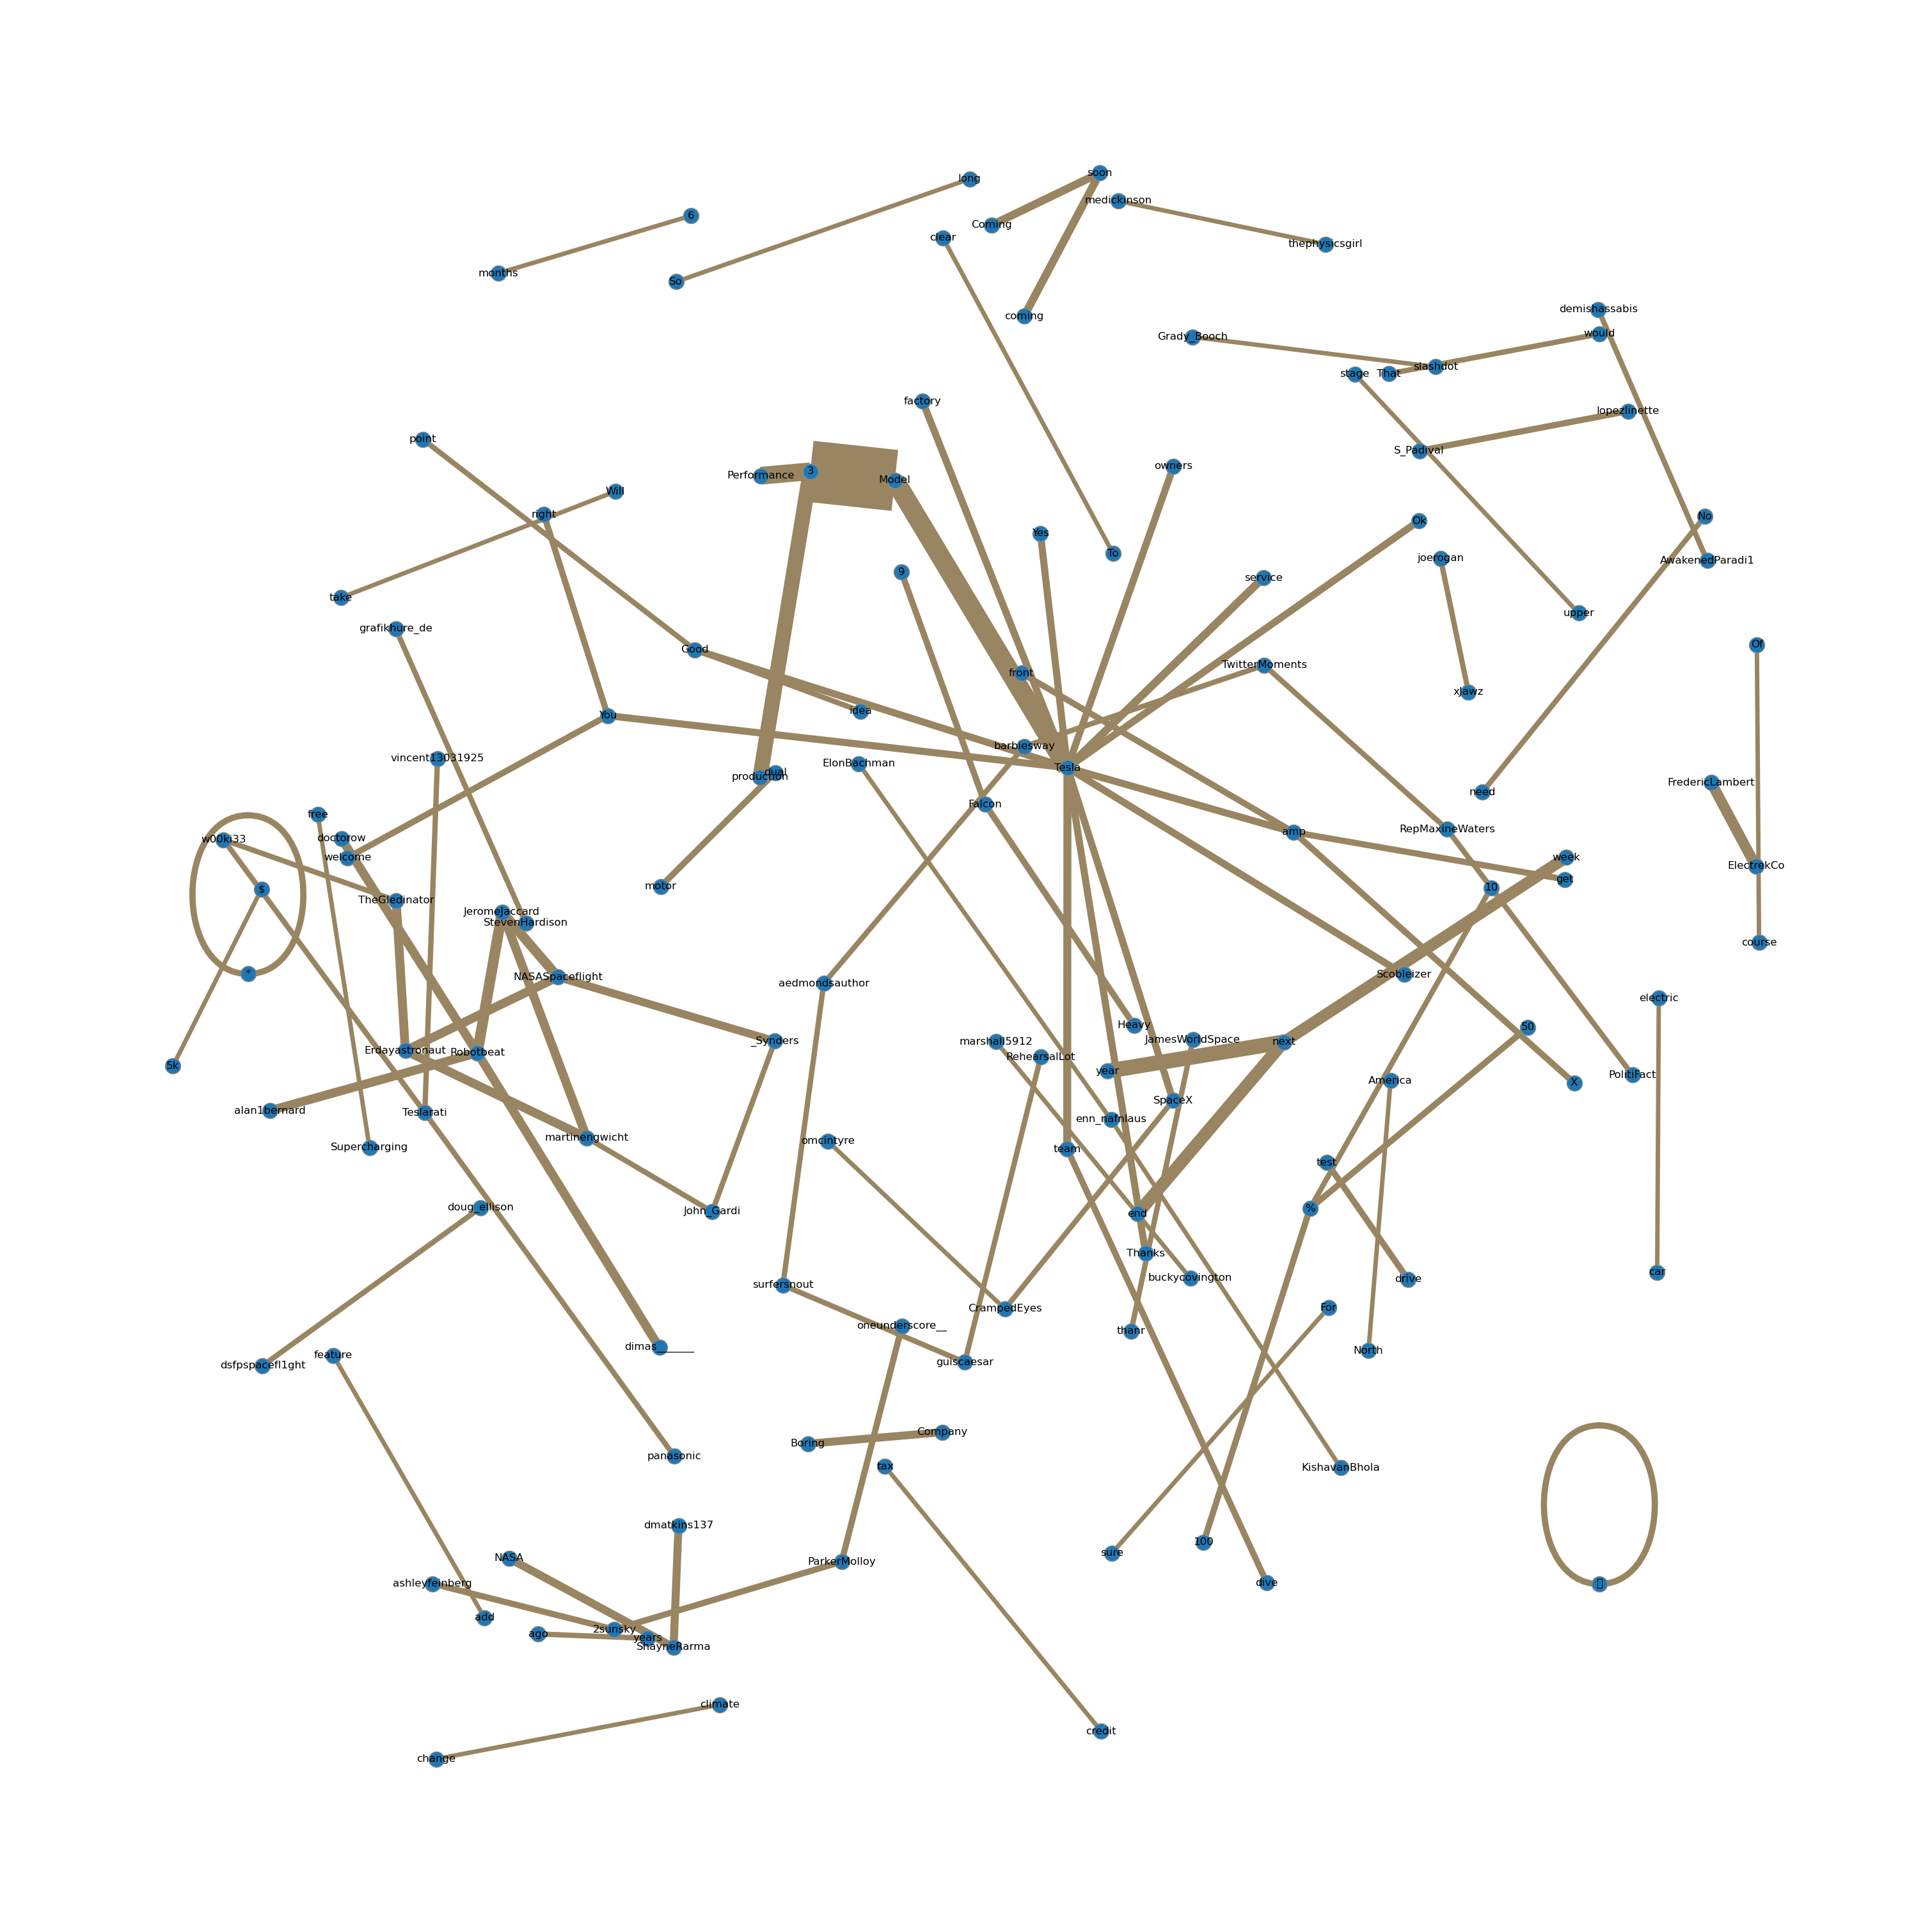

Year 2019


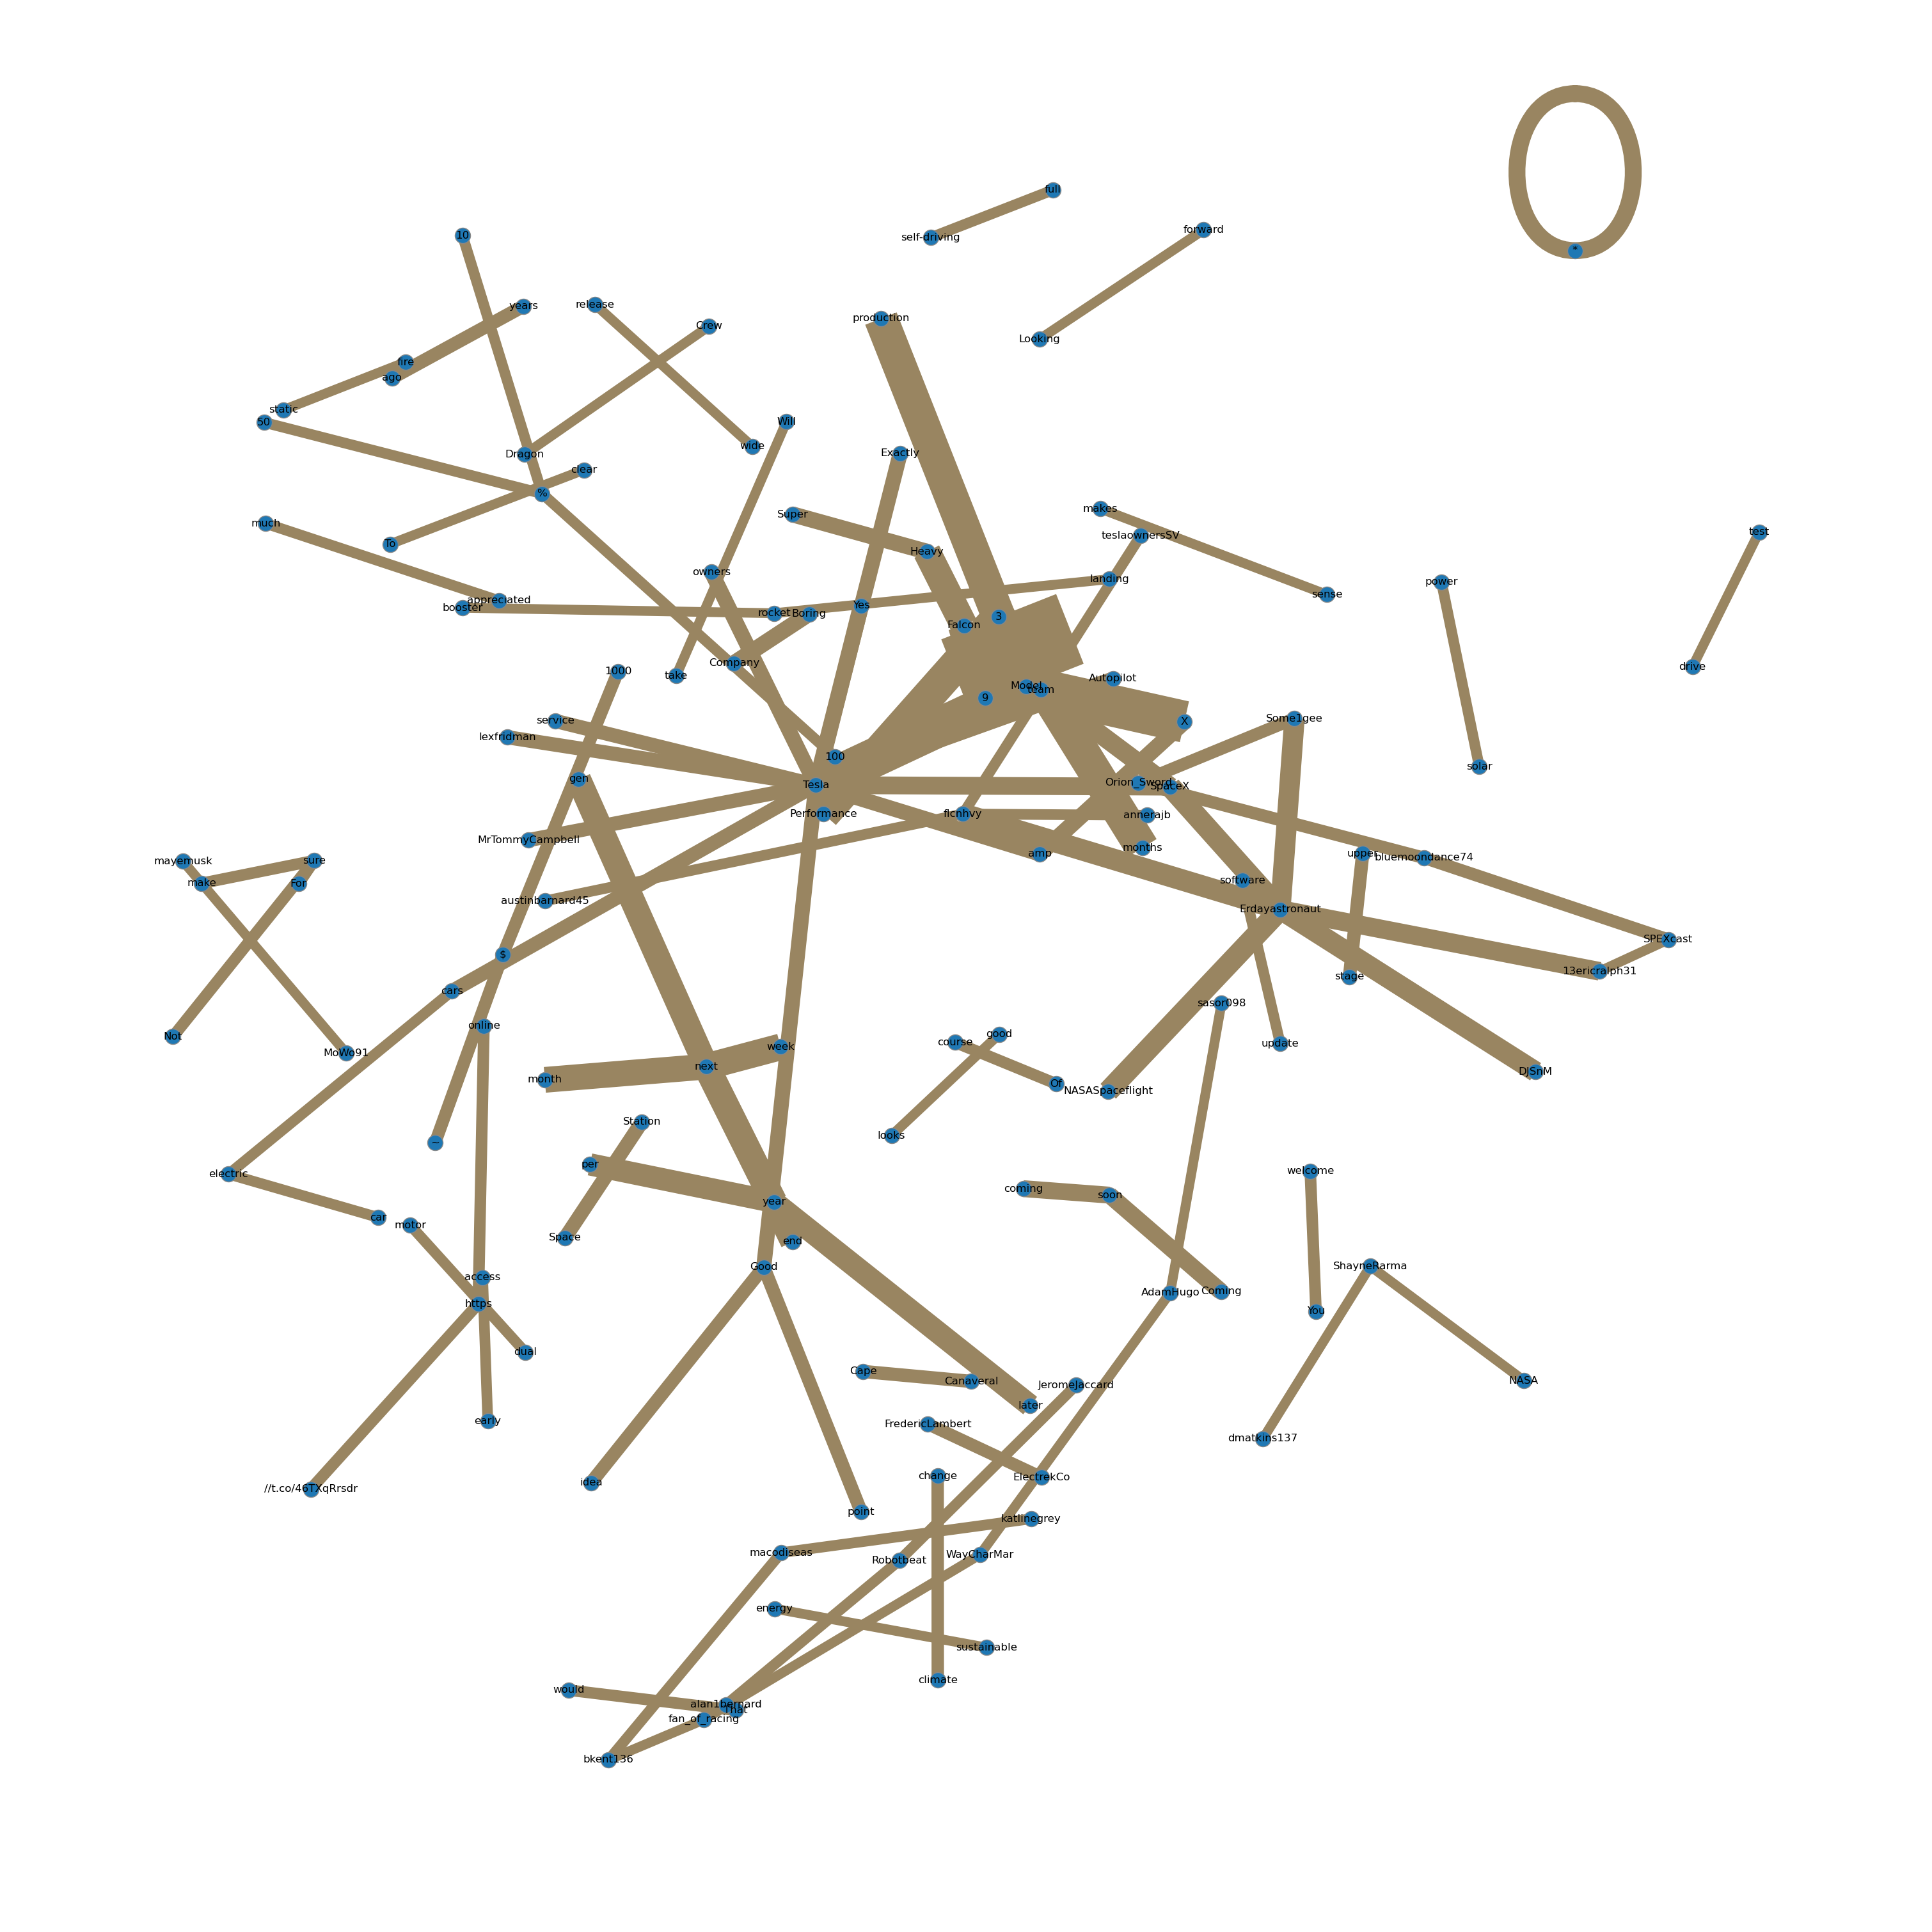

Year 2020


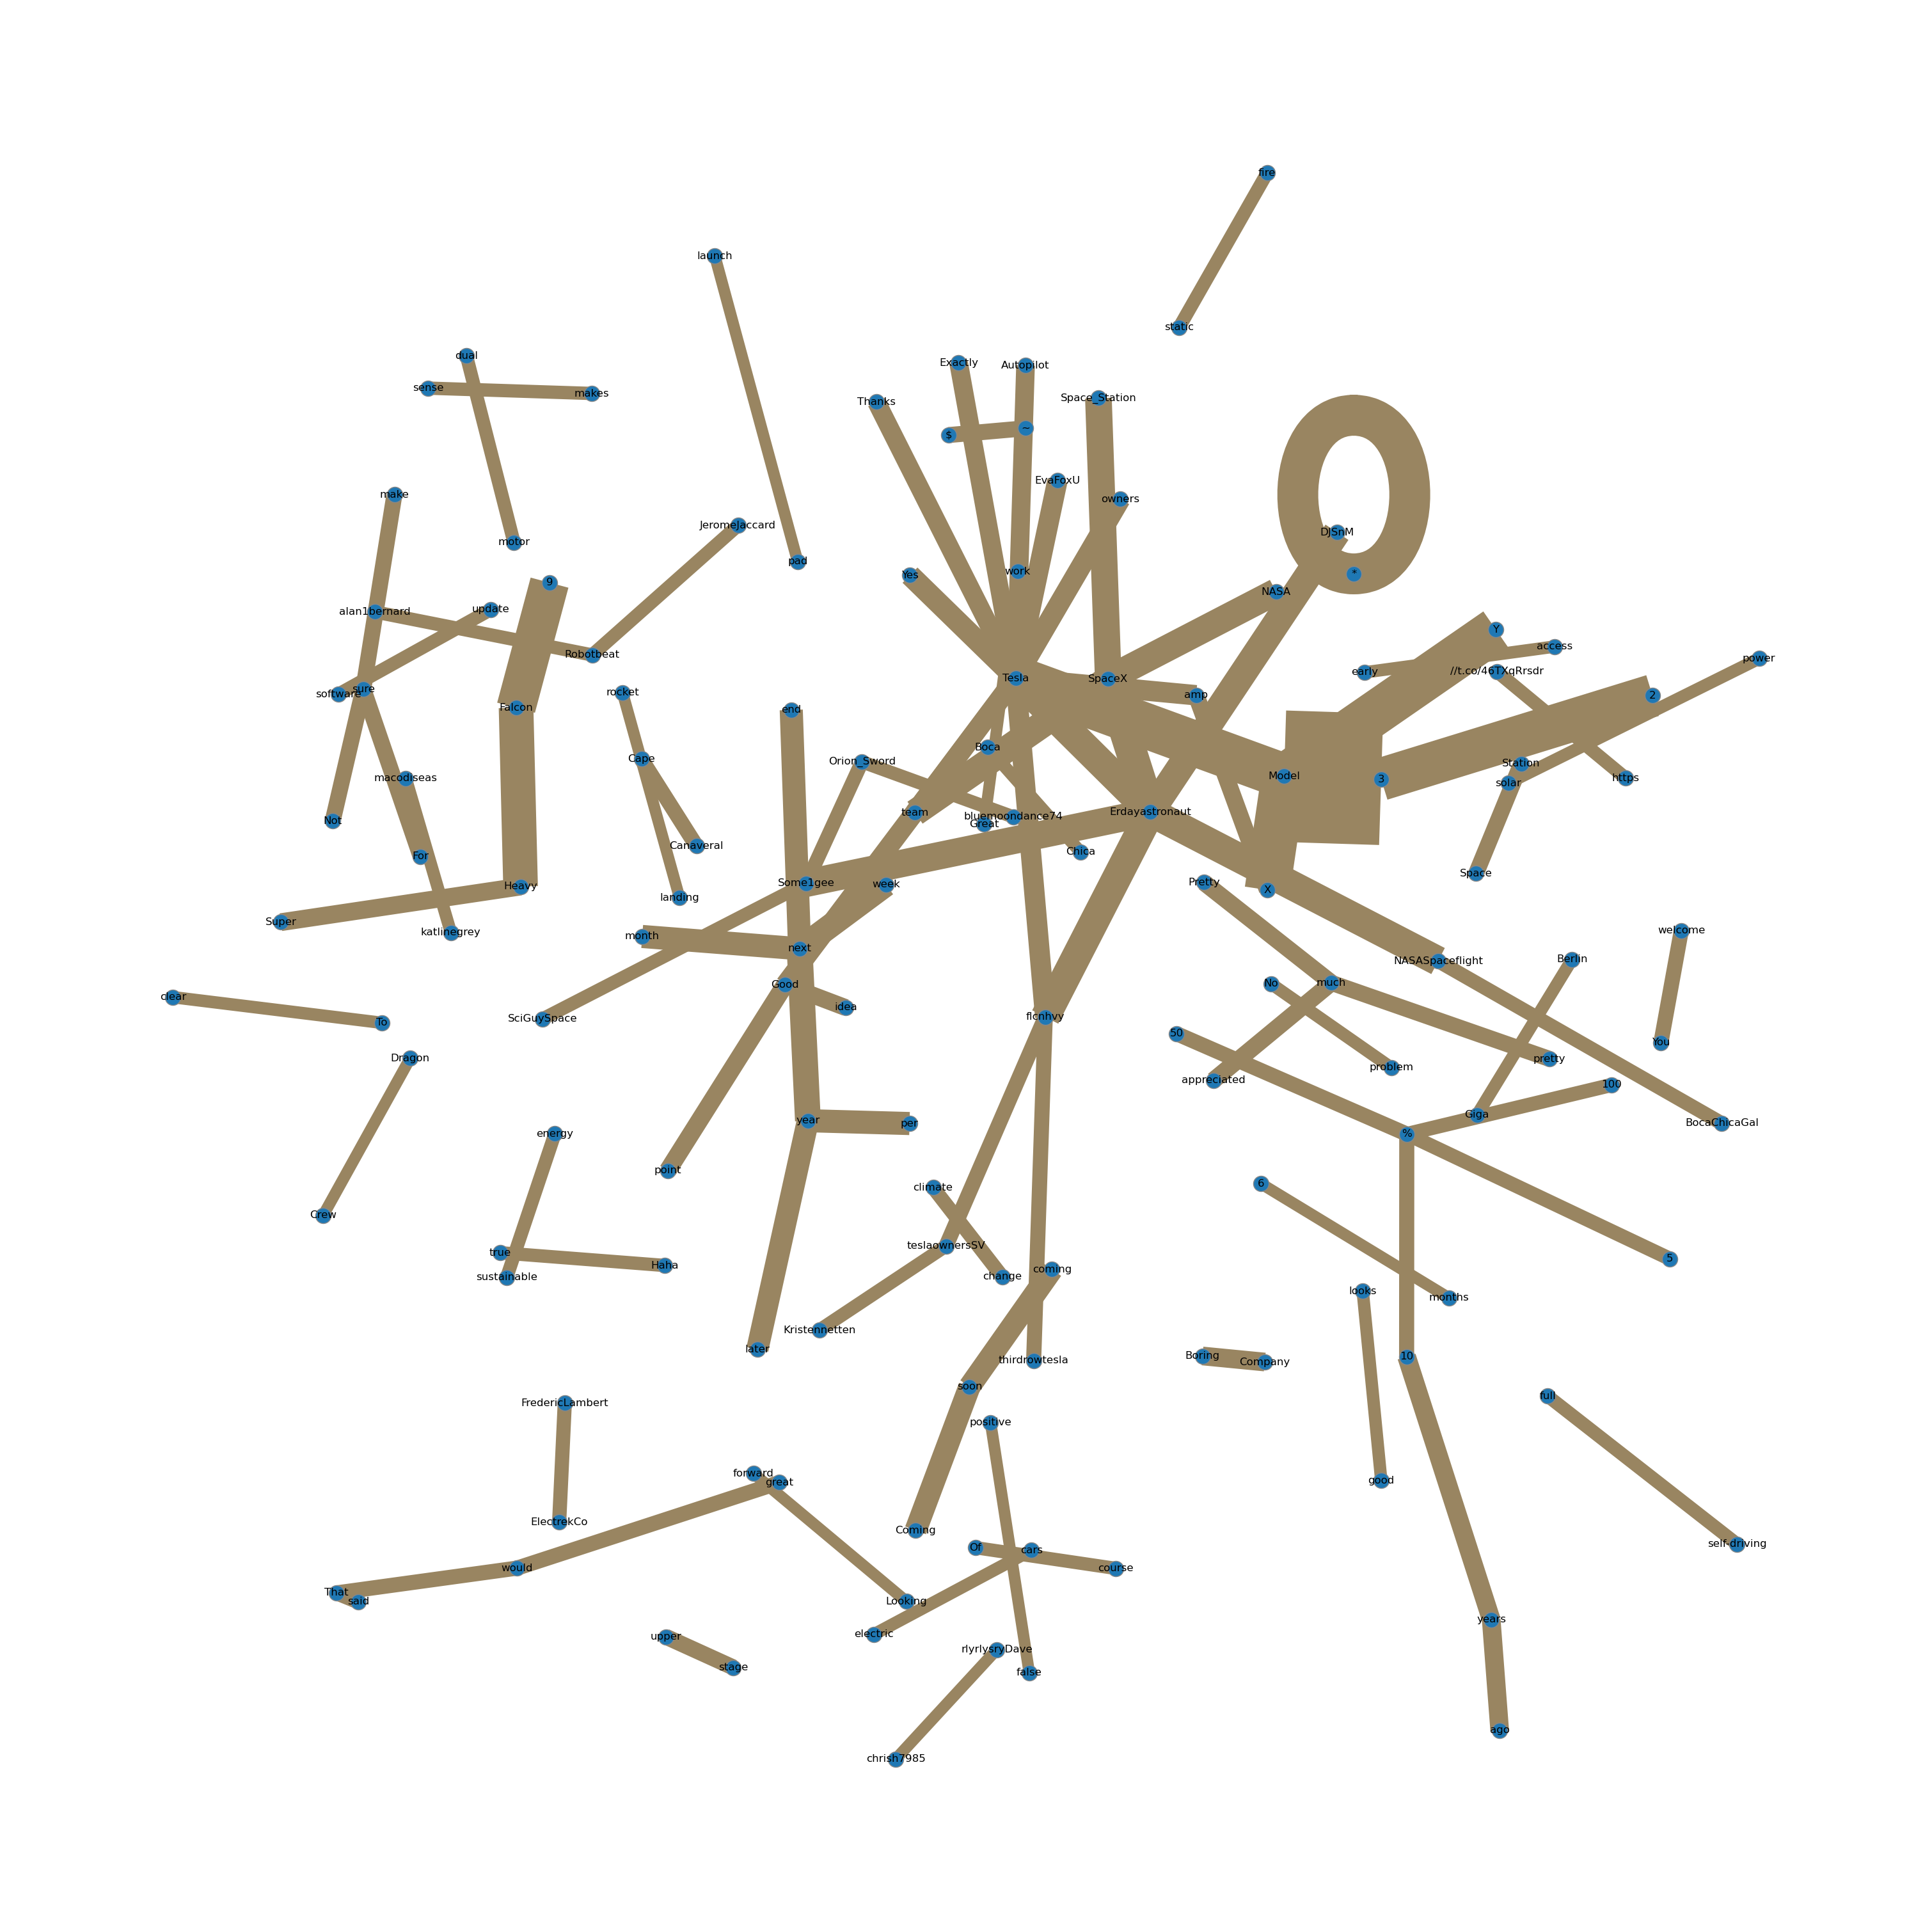

Year 2021


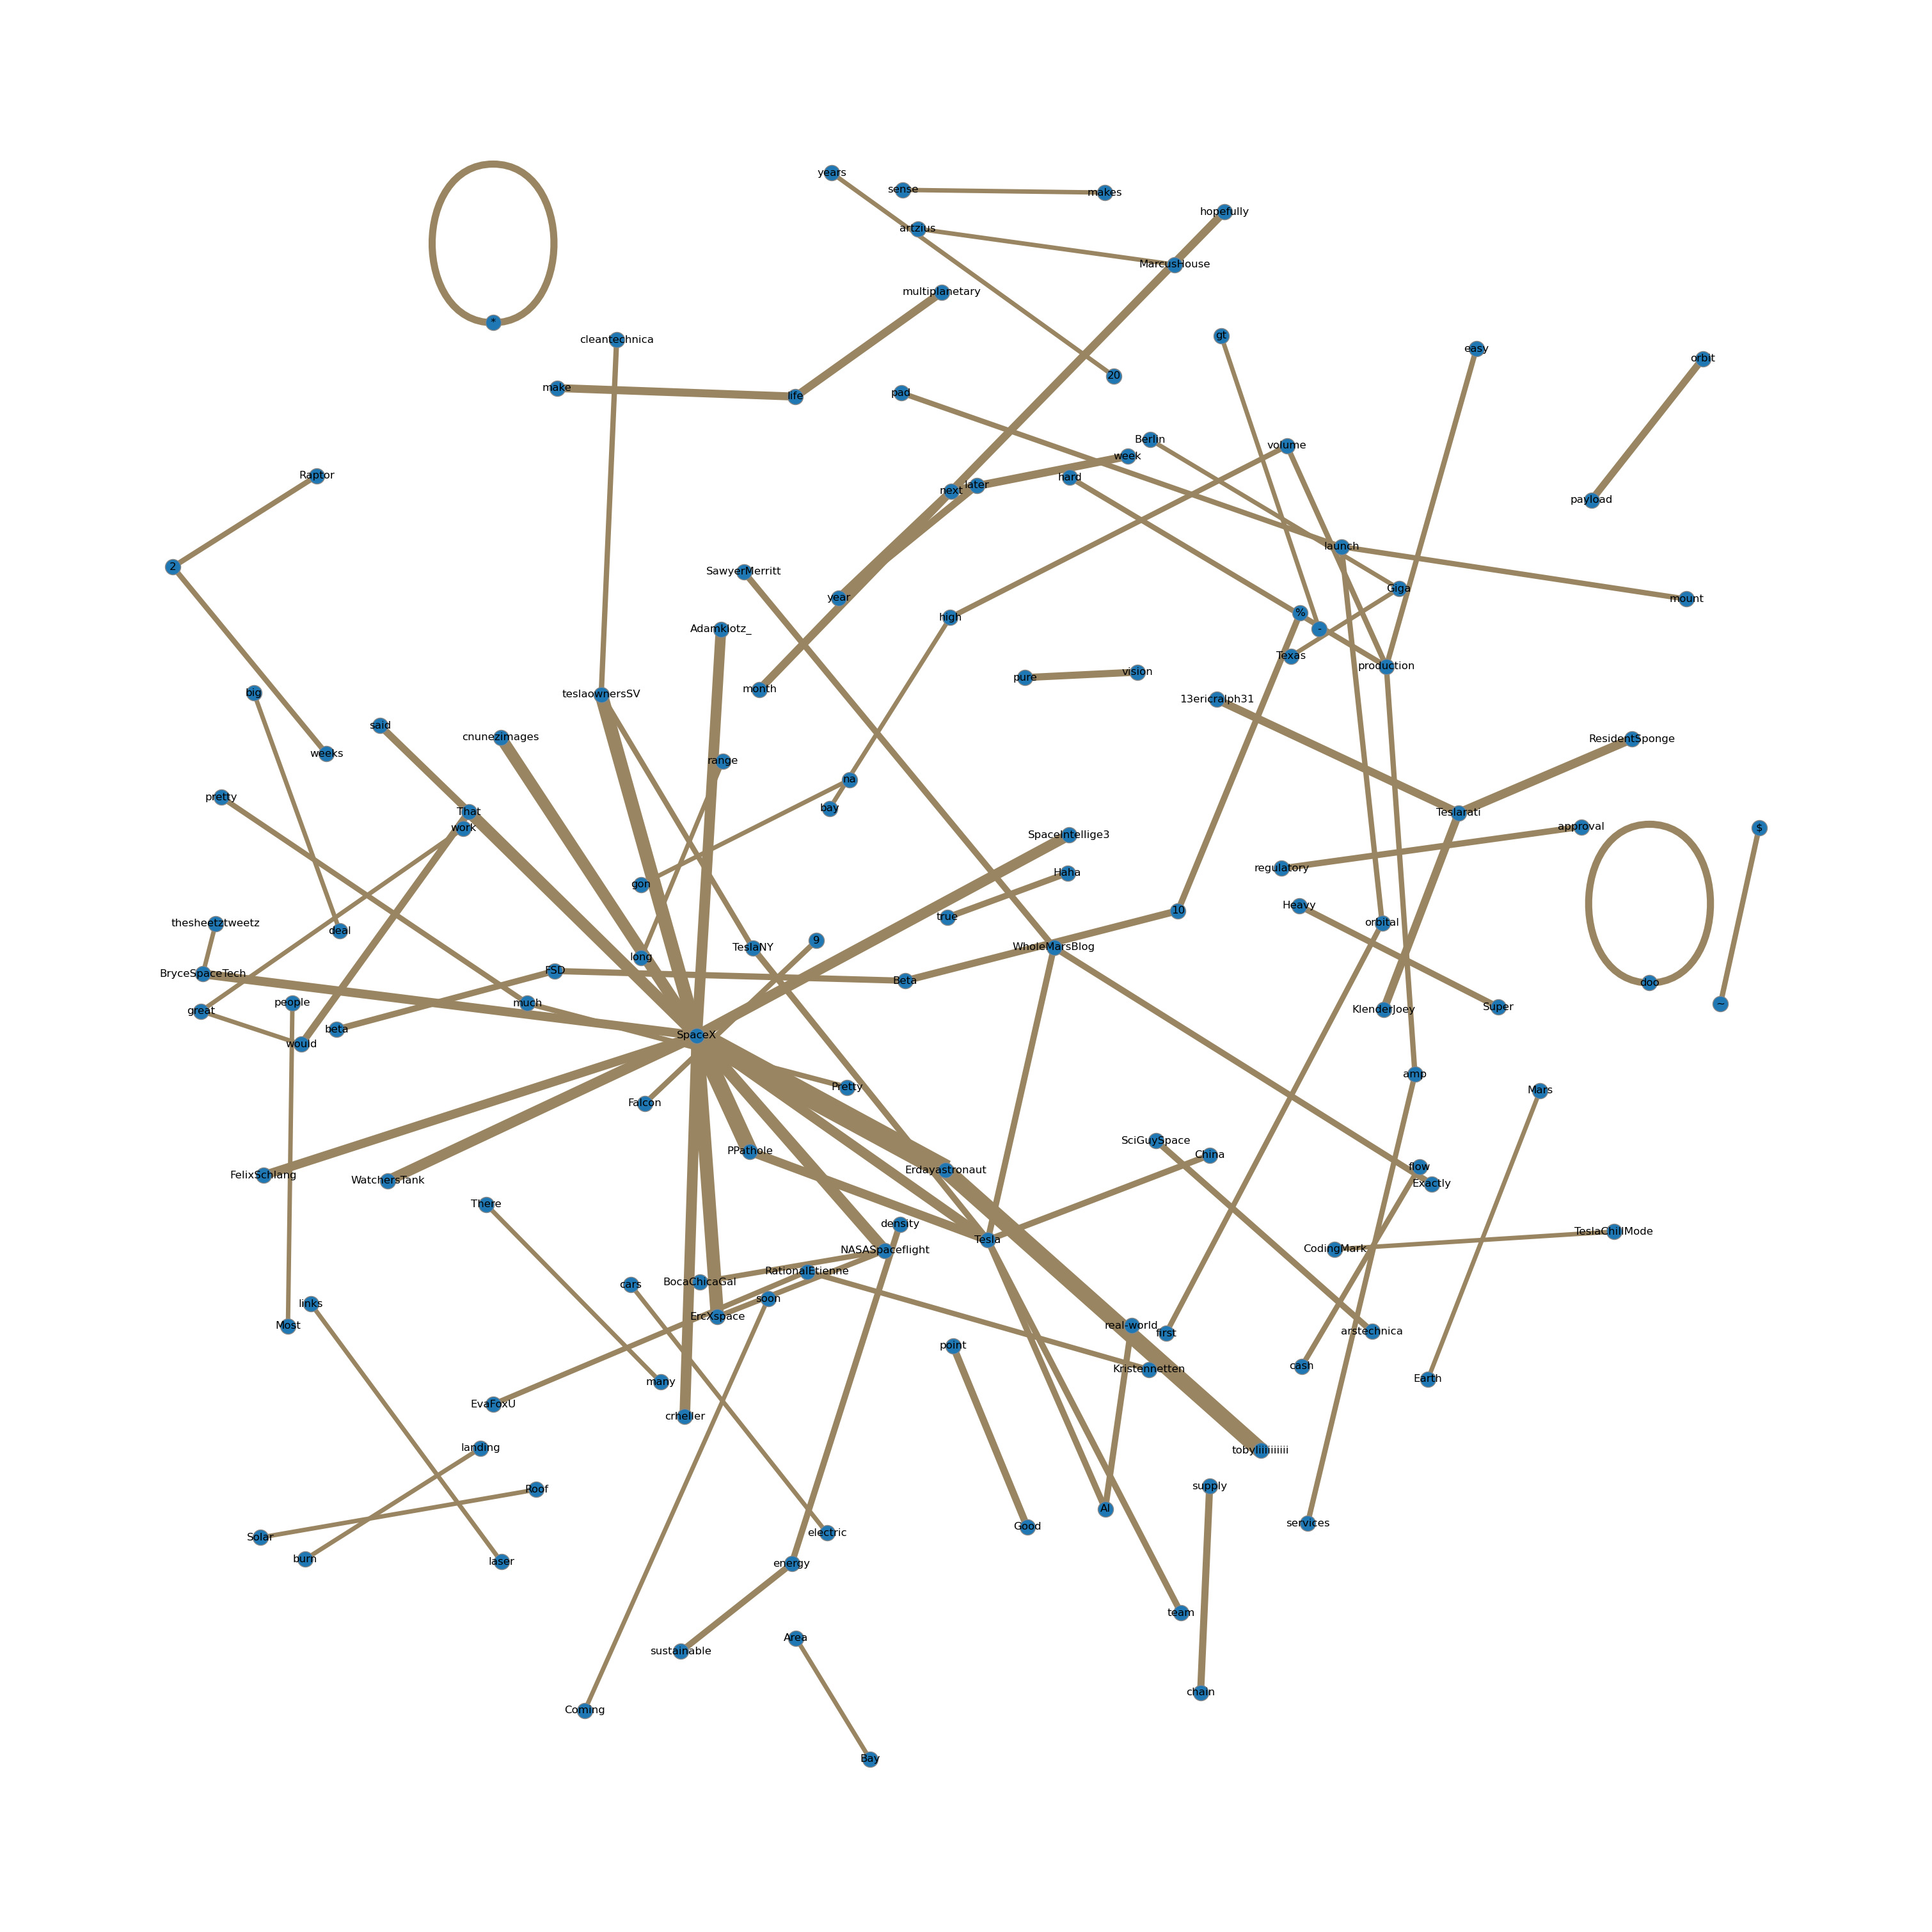

Year 2022


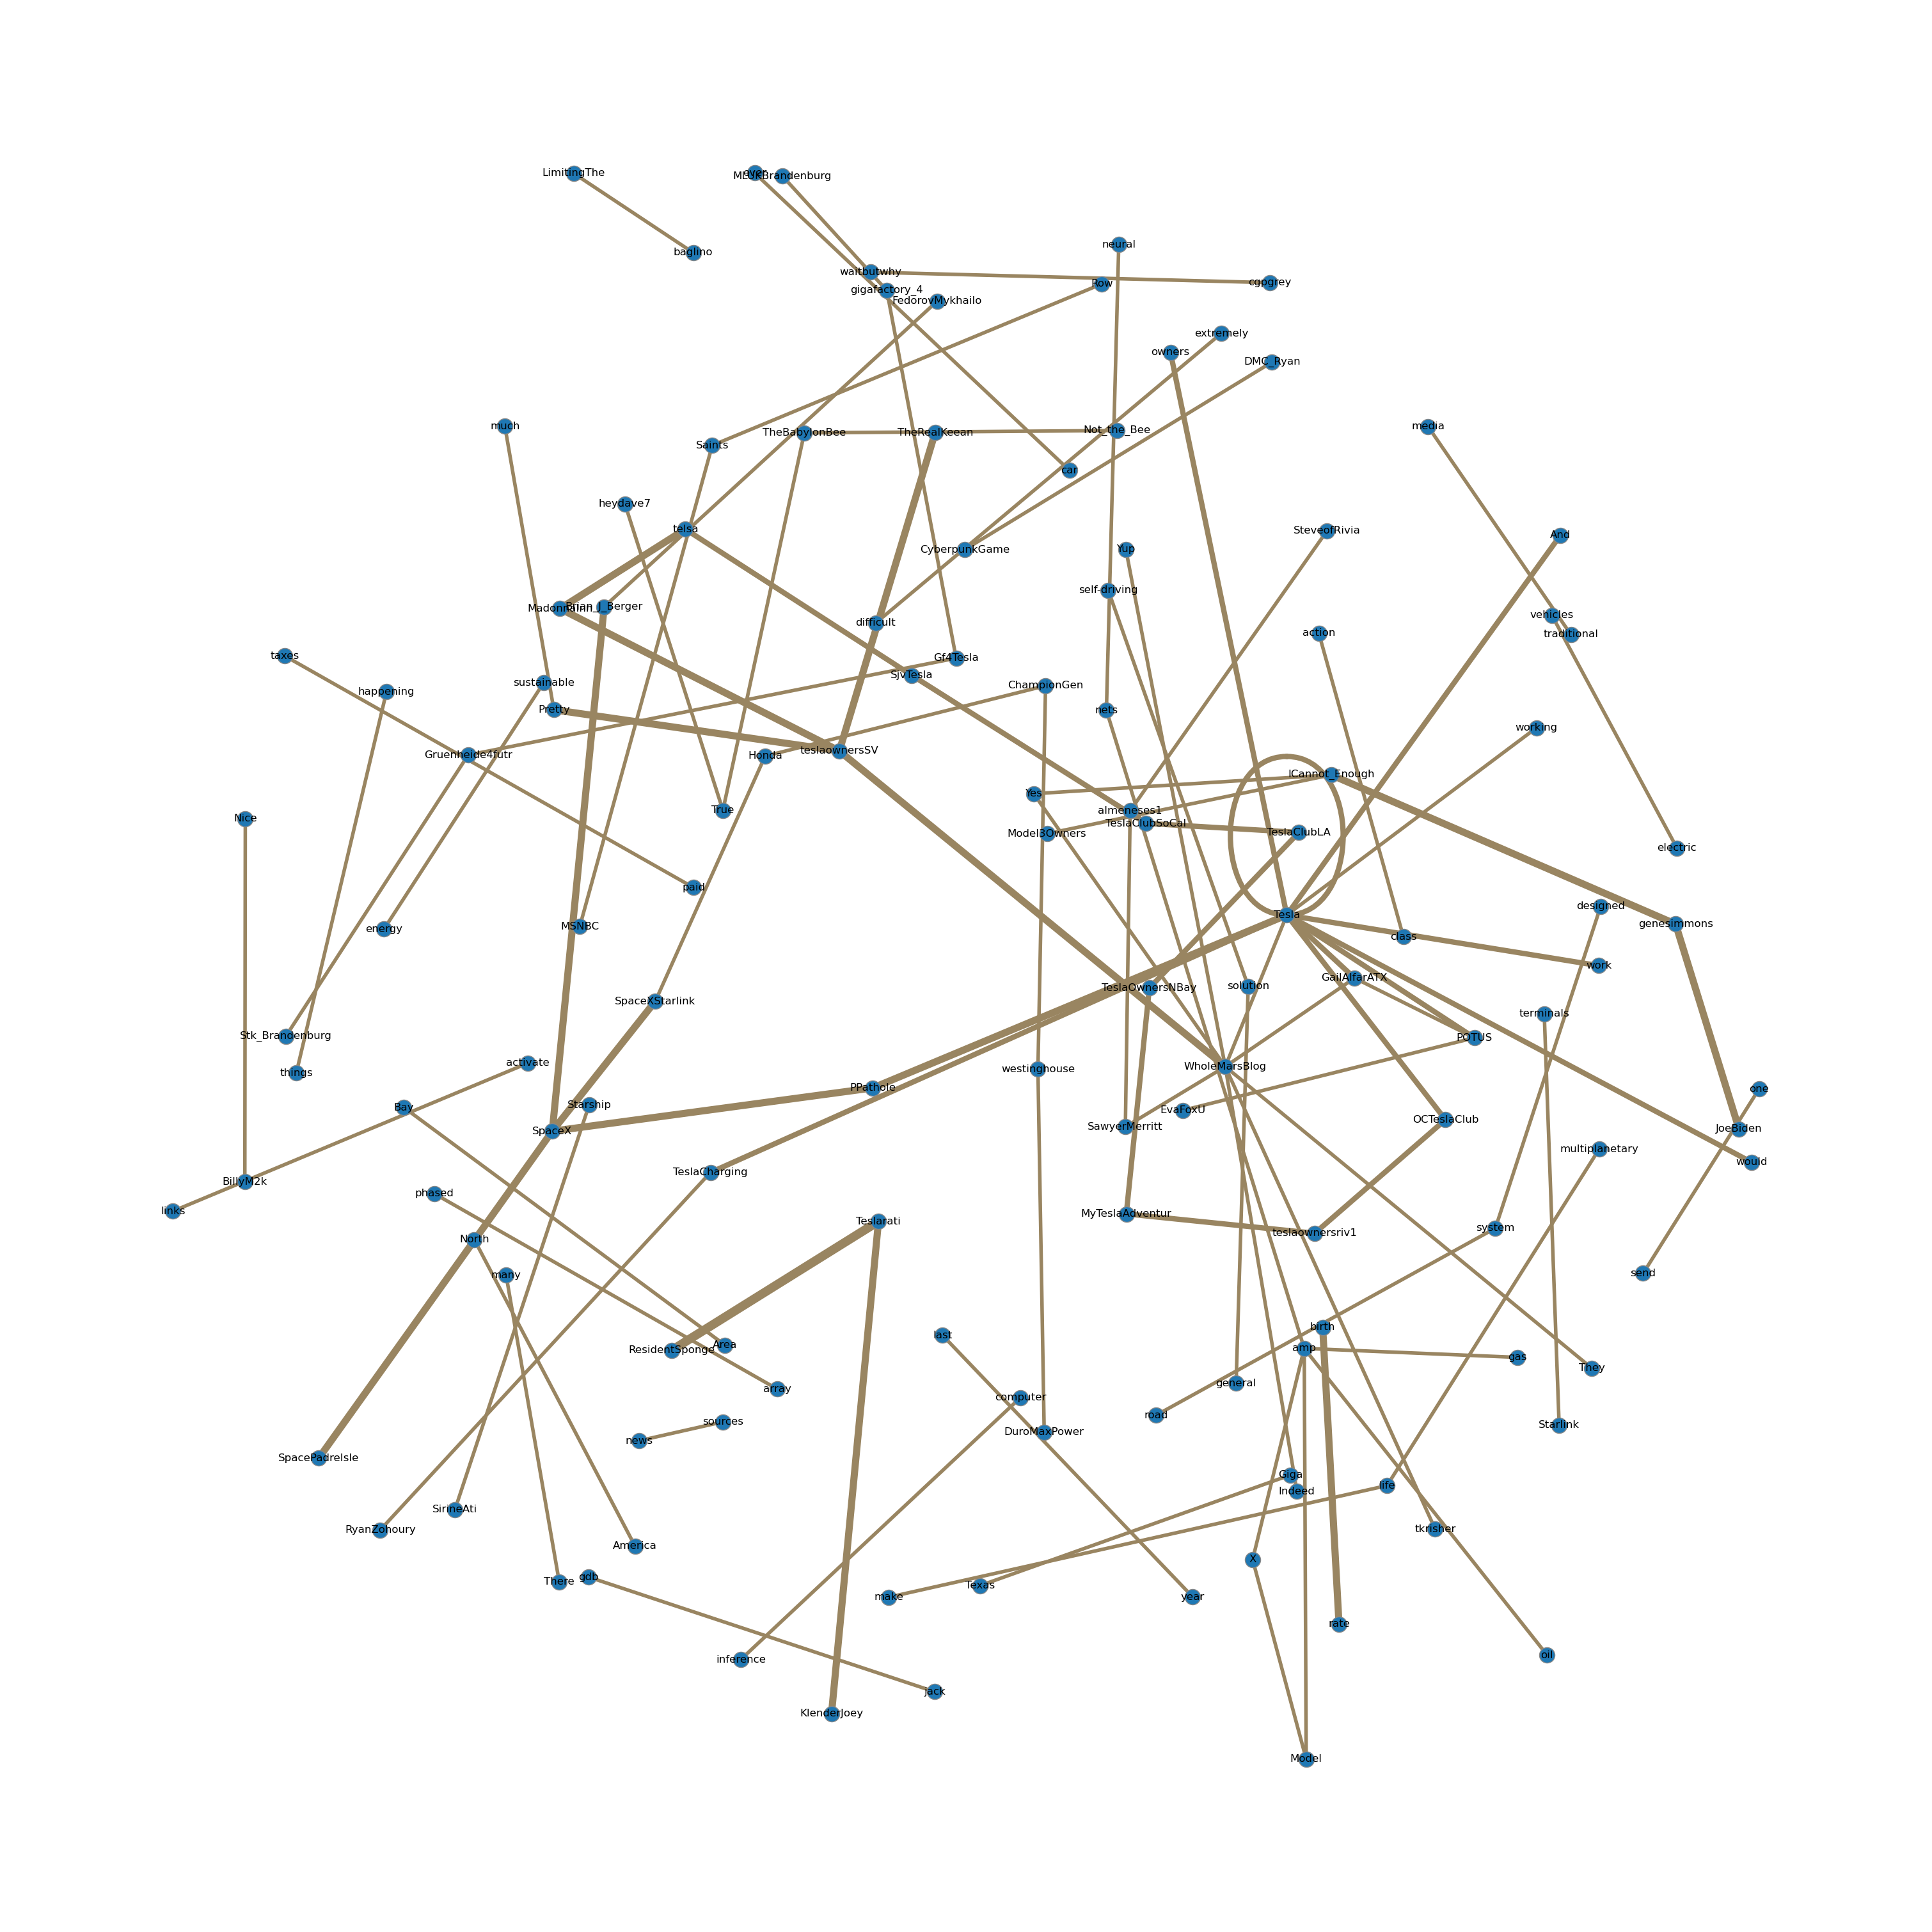

In [37]:
year_list = list(range(2017, 2023))
for year in year_list:
    print(f'Year {year}')
    biagram = bigram_network(year) # Calling the Bigram function to create network graphs for each year